# **Five Days Stock Price Prediction**

#**Dataset Type:** 
####            **Flat**
####            **Medium-flat**
####            **Fluctuate**
**Dataset Download: https://finance.yahoo.com/**            

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


In [1]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Flat Dataset 5 Day Stock Price Prediction**






**Dataset Details: Honda Motor Company Ltd(HMC).**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/HMC.csv', parse_dates=True, index_col=0)
df.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072   13200
2000-07-03  16.750000  16.843750  16.718750  16.718750  10.788588   18400
2000-07-05  18.437500  18.437500  18.187500  18.203125  11.746451  126800
2000-07-06  18.140625  18.203125  17.921875  18.062500  11.655708   47600
2000-07-07  17.750000  17.937500  17.750000  17.859375  11.524632   27200

In [ ]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_1_5d = df.resample('5D').agg(agg_dict)

In [ ]:
print(df_1_5d.head(10))
print('---------')
print(df_1_5d.tail(10))


                 Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  17.109375  17.250000  16.718750  16.718750  10.788588  15800.000000
2000-07-05  18.437500  18.437500  17.750000  17.859375  11.524632  67200.000000
2000-07-10  18.046875  18.500000  18.046875  18.250000  11.776699  63760.000000
2000-07-15  18.546875  18.609375  18.000000  18.000000  11.615376  26400.000000
2000-07-20  18.312500  18.500000  17.468750  18.046875  11.645626  52266.666667
2000-07-25  18.250000  18.468750  17.671875  17.750000  11.454054  33500.000000
2000-07-30  18.000000  19.062500  17.843750  18.812500  12.139682  35500.000000
2000-08-04  19.750000  20.031250  19.578125  19.687500  12.704320  49733.333333
2000-08-09  19.250000  19.281250  18.687500  19.015625  12.270759  59733.333333
2000-08-14  19.125000  19.125000  17.343750  17.500000  11.292729  58640.000000
---------
                 Open       Hi

In [ ]:
df_1_5d.shape

(1466, 6)

In [ ]:
df_1_5d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2000-06-30 to 2020-07-20
Freq: 5D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1466 non-null   float64
 1   High       1466 non-null   float64
 2   Low        1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Adj Close  1466 non-null   float64
 5   Volume     1466 non-null   float64
dtypes: float64(6)
memory usage: 120.2 KB


In [ ]:
df_1_5d.describe()

Open         High  ...    Adj Close        Volume
count  1466.000000  1466.000000  ...  1466.000000  1.466000e+03
mean     29.066117    29.599677  ...    22.876808  5.836069e+05
std       6.294744     6.329088  ...     6.210843  4.171021e+05
min      14.437500    16.139999  ...     9.010729  1.520000e+04
25%      24.312499    24.870001  ...    17.125664  3.157417e+05
50%      29.640000    30.205000  ...    24.502463  4.927167e+05
75%      33.849998    34.419998  ...    27.578405  7.305604e+05
max      44.340000    44.560001  ...    35.261700  4.112633e+06

[8 rows x 6 columns]

In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_5d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_5d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-05    0
2000-07-10    0
2000-07-15    0
2000-07-20    0
Freq: 5D, dtype: int64


**Open, High, Low, Close Price History in Plot**

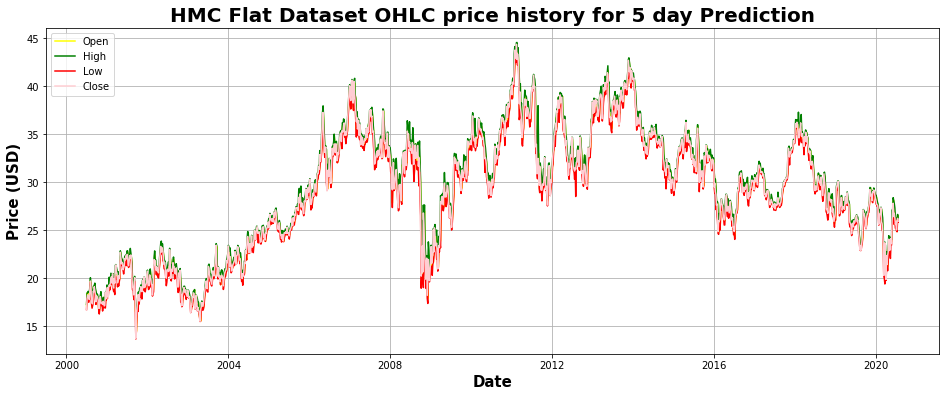

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.plot(df_1_5d["Open"], color = 'yellow')
plt.plot(df_1_5d["High"], color = 'green')
plt.plot(df_1_5d["Low"], color = 'red')
plt.plot(df_1_5d["Close"],color = '#ffcdd2')
plt.title('HMC Flat Dataset OHLC price history for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

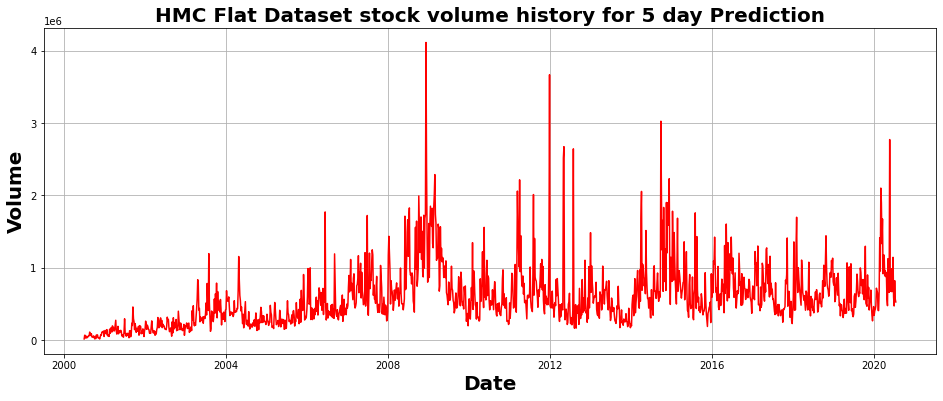

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.plot(df_1_5d["Volume"], color = 'red')
plt.title('HMC Flat Dataset stock volume history for 5 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

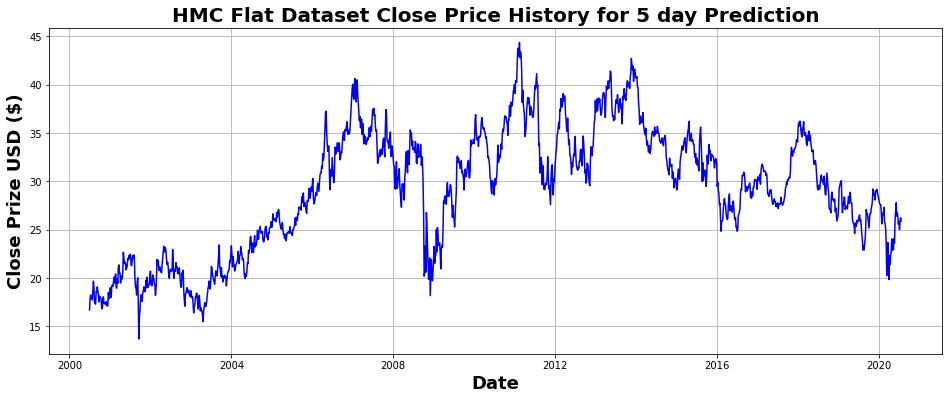

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.title('HMC Flat Dataset Close Price History for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_1_5d['Close'], color = 'blue')
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [ ]:
training_1 = df_1_5d[df_1_5d.index < datetime.datetime(year=2016, month=7, day=19)]
training_1

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  17.109375  17.250000  16.718750  16.718750  10.788588  1.580000e+04
2000-07-05  18.437500  18.437500  17.750000  17.859375  11.524632  6.720000e+04
2000-07-10  18.046875  18.500000  18.046875  18.250000  11.776699  6.376000e+04
2000-07-15  18.546875  18.609375  18.000000  18.000000  11.615376  2.640000e+04
2000-07-20  18.312500  18.500000  17.468750  18.046875  11.645626  5.226667e+04
...               ...        ...        ...        ...        ...           ...
2016-06-26  25.000000  25.610001  24.520000  25.330000  22.590313  1.423250e+06
2016-07-01  25.110001  25.280001  24.820000  24.850000  22.162233  1.064100e+06
2016-07-06  24.290001  25.139999  24.030001  25.090000  22.376274  9.166333e+05
2016-07-11  25.639999  26.639999  25.590000  26.469999  23.607014  1.134560e+06
2016-07-16  26.500000  26.709999  26.420000  26.580000  23.705118  7.245667e+05

[1173 rows x 6 columns]

In [ ]:
testing_1 = df_1_5d[df_1_5d.index >= datetime.datetime(year=2016, month=7, day=19)]
testing_1

Open       High  ...  Adj Close         Volume
Date                              ...                          
2016-07-21  27.080000  27.170000  ...  23.981588  590900.000000
2016-07-26  26.840000  27.360001  ...  24.186708  750625.000000
2016-07-31  27.120001  28.809999  ...  25.676086  928800.000000
2016-08-05  28.809999  29.400000  ...  26.059576  568766.666667
2016-08-10  29.290001  29.430000  ...  25.997147  442133.333333
...               ...        ...  ...        ...            ...
2020-06-30  25.590000  26.100000  ...  25.830000  595866.666667
2020-07-05  26.219999  26.219999  ...  25.020000  471075.000000
2020-07-10  24.840000  26.129999  ...  25.950001  821266.666667
2020-07-15  26.570000  26.629999  ...  26.230000  566200.000000
2020-07-20  26.100000  26.250000  ...  25.924999  526572.000000

[293 rows x 6 columns]

**HMC Training & Testing Combination for 5 Day**

<function matplotlib.pyplot.show>

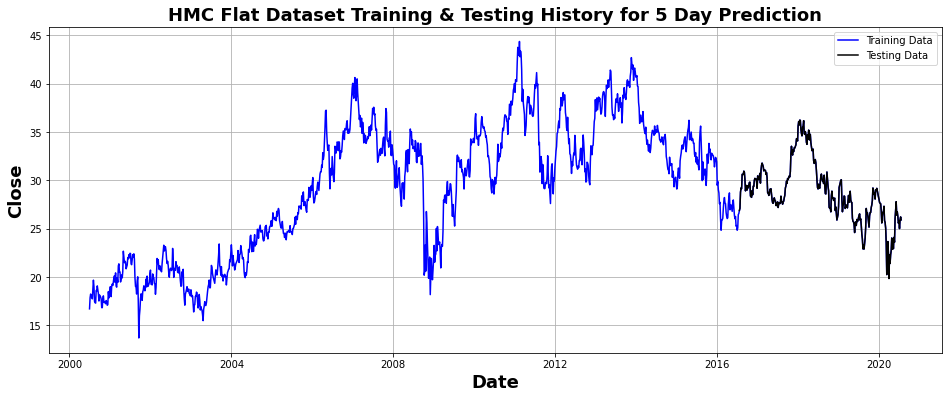

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
training_1, testing_1 =  df_1_5d[ df_1_5d.index < datetime.datetime(year=2016, month=7, day=19)],  df_1_5d[ df_1_5d.index >= datetime.datetime(year=2016, month=7, day=19)]
#plt.figure(figsize=(12,7))
plt.title('HMC Flat Dataset Training & Testing History for 5 Day Prediction', fontsize = 18,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot( df_1_5d['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'black', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [ ]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date                 
2000-06-30  16.718750
2000-07-05  17.859375
2000-07-10  18.250000
2000-07-15  18.000000
2000-07-20  18.046875
...               ...
2016-06-26  25.330000
2016-07-01  24.850000
2016-07-06  25.090000
2016-07-11  26.469999
2016-07-16  26.580000

[1173 rows x 1 columns]

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.889999
2016-07-26  27.120001
2016-07-31  28.790001
2016-08-05  29.219999
2016-08-10  29.150000
...               ...
2020-06-30  25.830000
2020-07-05  25.020000
2020-07-10  25.950001
2020-07-15  26.230000
2020-07-20  25.924999

[293 rows x 1 columns]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.09820628],
       [0.13540563],
       [0.14814513],
       ...,
       [0.37121893],
       [0.41622501],
       [0.41981249]])

In [ ]:
X_train_1 = []
y_train_1 = []
#length_1 = len(testing_length_1)
for i in range(30, 1173):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.09820628 0.13540563 0.14814513 0.13999185 0.14152059 0.13183857
 0.16649002 0.1950265  0.17311456 0.12368529 0.11909907 0.11757033
 0.16037506 0.15833674 0.17566246 0.16241338 0.14916429 0.12470445
 0.14508765 0.14101101 0.13846311 0.13132899 0.10228292 0.10228292
 0.13132899 0.14203017 0.12011823 0.12062781 0.11909907 0.11553201]


0.1262331879733612


In [ ]:
X_train_1.shape

(1143, 30)

In [ ]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(1143, 30, 1)

**Build RNN Model**

In [ ]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=32))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 30, 128)           16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                5152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,825
Trainable params: 21,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 40ms/step - loss: 0.2125 - mae: 0.3490 - mse: 0.2125
Epoch 2

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.889999
2016-07-26  27.120001
2016-07-31  28.790001
2016-08-05  29.219999
2016-08-10  29.150000
...               ...
2020-06-30  25.830000
2020-07-05  25.020000
2020-07-10  25.950001
2020-07-15  26.230000
2020-07-20  25.924999

[293 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.17    ],
       [29.879999],
       [29.190001],
       [30.469999],
       [30.18    ],
       [30.08    ],
       [30.440001],
       [30.73    ],
       [29.719999],
       [31.059999],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.450001],
       [30.99    ],
       [31.07    ],
       [31.049999],
       [31.040001],
       [30.620001],
       [30.809999],
       [30.26    ],
       [28.719999],
       [28.76    ],
       [28.450001],
       [28.52    ],
       [29.08    ],
       [29.08    ],
       [29.139999],
       [28.6     ],
       [27.99    ],
       [27.68    ],
       [27.629999],
       [27.93    ],
       [28.200001],
       [27.940001],
       [27.889999],
       [27.41    ],
       [27.65    ],
       [27.389999],
       [27.780001],
       [27.200001],
       [27.629999],
       [27.700001],
       [27.6     ],
       [27.66    ],
       [28.370001],
       [27.870001],
       [27.74    ],
       [27.540001],
       [27.77    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42992253],
       [0.43742361],
       [0.49188753],
       [0.50591111],
       [0.50362823],
       [0.55189562],
       [0.55091726],
       [0.55156956],
       [0.56265796],
       [0.55874441],
       [0.5346107 ],
       [0.49612721],
       [0.51471669],
       [0.50428049],
       [0.49906239],
       [0.51373826],
       [0.50656341],
       [0.51569508],
       [0.52450066],
       [0.52547902],
       [0.47851609],
       [0.47623317],
       [0.47427641],
       [0.49710563],
       [0.48308196],
       [0.51210764],
       [0.51080315],
       [0.53200165],
       [0.53819811],
       [0.53558906],
       [0.53689362],
       [0.52743578],
       [0.50493278],
       [0.54667752],
       [0.53721975],
       [0.53395844],
       [0.54569919],
       [0.55515697],
       [0.52221768],
       [0.56591927],
       [0.582552  ],
       [0.58972692],
       [0.58385655],
       [0.57863845],
       [0.56363638],
       [0.56624543],
       [0.56559314],
       [0.565

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(263, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.42992253]
  [0.43742361]
  [0.49188753]
  ...
  [0.53200165]
  [0.53819811]
  [0.53558906]]

 [[0.43742361]
  [0.49188753]
  [0.50591111]
  ...
  [0.53819811]
  [0.53558906]
  [0.53689362]]

 [[0.49188753]
  [0.50591111]
  [0.50362823]
  ...
  [0.53558906]
  [0.53689362]
  [0.52743578]]

 ...

 [[0.42633515]
  [0.44427233]
  [0.39633107]
  ...
  [0.38719936]
  [0.39535264]
  [0.36893601]]

 [[0.44427233]
  [0.39633107]
  [0.38980841]
  ...
  [0.39535264]
  [0.36893601]
  [0.39926625]]

 [[0.39633107]
  [0.38980841]
  [0.37056667]
  ...
  [0.36893601]
  [0.39926625]
  [0.40839789]]]


In [ ]:
RNN_1_Stock_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Stock_Price_Prediction_1 = sc.inverse_transform(RNN_1_Stock_Price_Prediction_1)

In [ ]:
print(RNN_1_Stock_Price_Prediction_1)

[[30.160654]
 [30.115965]
 [29.868107]
 [29.337936]
 [30.435127]
 [30.169037]
 [30.23791 ]
 [30.346478]
 [30.719181]
 [29.82553 ]
 [30.995916]
 [31.474016]
 [31.739422]
 [31.383366]
 [31.512506]
 [30.982111]
 [31.091444]
 [31.120192]
 [31.110092]
 [30.453165]
 [30.82753 ]
 [30.14588 ]
 [29.004963]
 [28.975063]
 [28.496475]
 [28.641409]
 [29.067741]
 [29.036427]
 [29.319658]
 [28.584984]
 [28.28644 ]
 [27.894554]
 [27.801334]
 [28.061985]
 [28.241491]
 [28.032892]
 [27.999474]
 [27.534706]
 [27.854906]
 [27.559464]
 [27.980259]
 [27.42497 ]
 [27.84136 ]
 [27.84101 ]
 [27.834576]
 [27.904608]
 [28.383015]
 [28.085821]
 [27.948473]
 [27.728794]
 [28.073797]
 [27.892279]
 [28.305387]
 [28.482502]
 [29.115059]
 [29.392244]
 [29.94426 ]
 [29.711082]
 [30.252174]
 [30.006754]
 [30.278885]
 [30.399057]
 [30.385704]
 [30.817263]
 [32.46458 ]
 [33.093918]
 [32.76724 ]
 [32.4393  ]
 [33.001305]
 [32.798496]
 [33.277176]
 [33.168427]
 [33.285076]
 [33.260788]
 [33.959953]
 [34.092854]
 [33.86385 ]

<function matplotlib.pyplot.show>

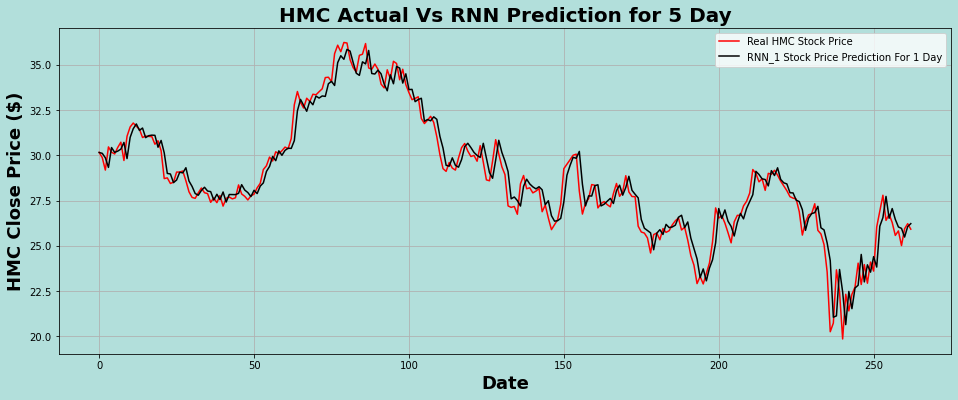

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real HMC Stock Price')
plt.plot(RNN_1_Stock_Price_Prediction_1, color = 'black', label = 'RNN_1 Stock Price Prediction For 1 Day')
plt.title('HMC Actual Vs RNN Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Stock_Price_Prediction_1))

R Squared = 0.9428491194398868


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.5785878444295091


In [ ]:
def mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1): 
    y_test_1, RNN_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - RNN_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1))  

Mean Absolute Percentage Error: 2.106380623422032


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.6146624661662269


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.7840041238196562


**Build LSTM Model**

In [ ]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=128))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0464 - mae: 0.1486 - mse: 0.0464
Epoch

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.889999
2016-07-26  27.120001
2016-07-31  28.790001
2016-08-05  29.219999
2016-08-10  29.150000
...               ...
2020-06-30  25.830000
2020-07-05  25.020000
2020-07-10  25.950001
2020-07-15  26.230000
2020-07-20  25.924999

[293 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.17    ],
       [29.879999],
       [29.190001],
       [30.469999],
       [30.18    ],
       [30.08    ],
       [30.440001],
       [30.73    ],
       [29.719999],
       [31.059999],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.450001],
       [30.99    ],
       [31.07    ],
       [31.049999],
       [31.040001],
       [30.620001],
       [30.809999],
       [30.26    ],
       [28.719999],
       [28.76    ],
       [28.450001],
       [28.52    ],
       [29.08    ],
       [29.08    ],
       [29.139999],
       [28.6     ],
       [27.99    ],
       [27.68    ],
       [27.629999],
       [27.93    ],
       [28.200001],
       [27.940001],
       [27.889999],
       [27.41    ],
       [27.65    ],
       [27.389999],
       [27.780001],
       [27.200001],
       [27.629999],
       [27.700001],
       [27.6     ],
       [27.66    ],
       [28.370001],
       [27.870001],
       [27.74    ],
       [27.540001],
       [27.77    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42992253],
       [0.43742361],
       [0.49188753],
       [0.50591111],
       [0.50362823],
       [0.55189562],
       [0.55091726],
       [0.55156956],
       [0.56265796],
       [0.55874441],
       [0.5346107 ],
       [0.49612721],
       [0.51471669],
       [0.50428049],
       [0.49906239],
       [0.51373826],
       [0.50656341],
       [0.51569508],
       [0.52450066],
       [0.52547902],
       [0.47851609],
       [0.47623317],
       [0.47427641],
       [0.49710563],
       [0.48308196],
       [0.51210764],
       [0.51080315],
       [0.53200165],
       [0.53819811],
       [0.53558906],
       [0.53689362],
       [0.52743578],
       [0.50493278],
       [0.54667752],
       [0.53721975],
       [0.53395844],
       [0.54569919],
       [0.55515697],
       [0.52221768],
       [0.56591927],
       [0.582552  ],
       [0.58972692],
       [0.58385655],
       [0.57863845],
       [0.56363638],
       [0.56624543],
       [0.56559314],
       [0.565

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(263, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(263, 30, 1)

In [ ]:
LSTM_1_Stock_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Stock_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Stock_Price_Prediction_1)

In [ ]:
print(LSTM_1_Stock_Price_Prediction_1)

[[29.975296]
 [30.020594]
 [29.822374]
 [29.276825]
 [30.118332]
 [30.056164]
 [29.960775]
 [30.220669]
 [30.490505]
 [29.779636]
 [30.66978 ]
 [31.222134]
 [31.482044]
 [31.39997 ]
 [31.285717]
 [30.925447]
 [30.934658]
 [30.911161]
 [30.889074]
 [30.557901]
 [30.64728 ]
 [30.238518]
 [29.019707]
 [28.818352]
 [28.533026]
 [28.49485 ]
 [28.874054]
 [28.951145]
 [29.01058 ]
 [28.641588]
 [28.131931]
 [27.799768]
 [27.67944 ]
 [27.848597]
 [28.070894]
 [27.934645]
 [27.863205]
 [27.513788]
 [27.591105]
 [27.43146 ]
 [27.65254 ]
 [27.306196]
 [27.50504 ]
 [27.611858]
 [27.564014]
 [27.592134]
 [28.100376]
 [27.879795]
 [27.728544]
 [27.558638]
 [27.675783]
 [27.767551]
 [28.031689]
 [28.274998]
 [28.880676]
 [29.182518]
 [29.608541]
 [29.550362]
 [29.93064 ]
 [29.935986]
 [30.06968 ]
 [30.251562]
 [30.21929 ]
 [30.64106 ]
 [32.168076]
 [32.991573]
 [32.63849 ]
 [32.404907]
 [32.841095]
 [32.74088 ]
 [33.055786]
 [33.06157 ]
 [33.20517 ]
 [33.353756]
 [33.88288 ]
 [33.94935 ]
 [33.775787]

<function matplotlib.pyplot.show>

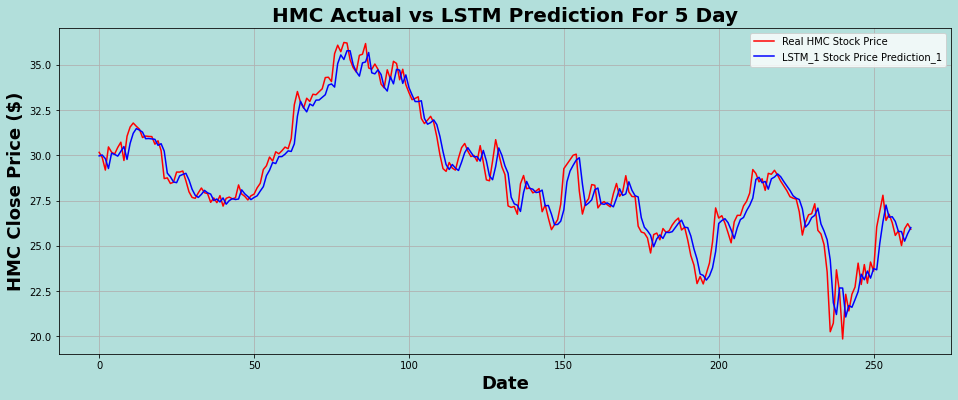

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real HMC Stock Price')
plt.plot(LSTM_1_Stock_Price_Prediction_1, color = 'blue', label = 'LSTM_1 Stock Price Prediction_1')
plt.title('HMC Actual vs LSTM Prediction For 5 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Stock_Price_Prediction_1))

R Squared = 0.9409317870490822


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.5807956364022024


In [ ]:
def mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1): 
    y_test_1, LSTM_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - LSTM_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 2.10279988674666


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.6352835352423674


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.7970467585043975


**Build GRU Model**

In [ ]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=512, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=1024))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 512)           791040    
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 512)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1024)              4724736   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 5,516,801
Trainable params: 5,516,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 0.0246 - mae: 0.0899 - mse: 0.0246
E

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.889999
2016-07-26  27.120001
2016-07-31  28.790001
2016-08-05  29.219999
2016-08-10  29.150000
...               ...
2020-06-30  25.830000
2020-07-05  25.020000
2020-07-10  25.950001
2020-07-15  26.230000
2020-07-20  25.924999

[293 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.17    ],
       [29.879999],
       [29.190001],
       [30.469999],
       [30.18    ],
       [30.08    ],
       [30.440001],
       [30.73    ],
       [29.719999],
       [31.059999],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.450001],
       [30.99    ],
       [31.07    ],
       [31.049999],
       [31.040001],
       [30.620001],
       [30.809999],
       [30.26    ],
       [28.719999],
       [28.76    ],
       [28.450001],
       [28.52    ],
       [29.08    ],
       [29.08    ],
       [29.139999],
       [28.6     ],
       [27.99    ],
       [27.68    ],
       [27.629999],
       [27.93    ],
       [28.200001],
       [27.940001],
       [27.889999],
       [27.41    ],
       [27.65    ],
       [27.389999],
       [27.780001],
       [27.200001],
       [27.629999],
       [27.700001],
       [27.6     ],
       [27.66    ],
       [28.370001],
       [27.870001],
       [27.74    ],
       [27.540001],
       [27.77    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42992253],
       [0.43742361],
       [0.49188753],
       [0.50591111],
       [0.50362823],
       [0.55189562],
       [0.55091726],
       [0.55156956],
       [0.56265796],
       [0.55874441],
       [0.5346107 ],
       [0.49612721],
       [0.51471669],
       [0.50428049],
       [0.49906239],
       [0.51373826],
       [0.50656341],
       [0.51569508],
       [0.52450066],
       [0.52547902],
       [0.47851609],
       [0.47623317],
       [0.47427641],
       [0.49710563],
       [0.48308196],
       [0.51210764],
       [0.51080315],
       [0.53200165],
       [0.53819811],
       [0.53558906],
       [0.53689362],
       [0.52743578],
       [0.50493278],
       [0.54667752],
       [0.53721975],
       [0.53395844],
       [0.54569919],
       [0.55515697],
       [0.52221768],
       [0.56591927],
       [0.582552  ],
       [0.58972692],
       [0.58385655],
       [0.57863845],
       [0.56363638],
       [0.56624543],
       [0.56559314],
       [0.565

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(263, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(263, 30, 1)

In [ ]:
GRU_1_Stock_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Stock_Price_Prediction_1 = sc.inverse_transform(GRU_1_Stock_Price_Prediction_1)

In [ ]:
print(GRU_1_Stock_Price_Prediction_1)

[[29.908161]
 [29.96479 ]
 [29.683022]
 [29.042538]
 [30.29157 ]
 [29.839155]
 [29.915838]
 [30.208874]
 [30.478643]
 [29.517105]
 [30.91834 ]
 [31.194284]
 [31.548807]
 [31.383198]
 [31.288107]
 [30.832457]
 [30.93124 ]
 [30.846228]
 [30.84928 ]
 [30.4293  ]
 [30.643724]
 [30.04584 ]
 [28.627645]
 [28.694191]
 [28.223536]
 [28.321428]
 [28.79736 ]
 [28.774557]
 [28.89324 ]
 [28.369541]
 [27.837456]
 [27.517738]
 [27.427368]
 [27.679955]
 [27.908113]
 [27.670078]
 [27.667852]
 [27.183954]
 [27.448137]
 [27.125103]
 [27.548779]
 [26.925943]
 [27.4282  ]
 [27.393929]
 [27.354984]
 [27.413967]
 [28.092194]
 [27.571444]
 [27.559645]
 [27.313156]
 [27.548212]
 [27.58837 ]
 [27.94667 ]
 [28.168272]
 [28.929777]
 [29.107853]
 [29.651552]
 [29.42627 ]
 [30.002945]
 [29.830114]
 [30.072882]
 [30.227562]
 [30.155233]
 [30.71956 ]
 [32.48512 ]
 [33.11925 ]
 [32.69958 ]
 [32.516907]
 [33.0111  ]
 [32.771523]
 [33.23282 ]
 [33.131336]
 [33.357597]
 [33.480114]
 [34.100483]
 [34.081722]
 [33.925663]

<function matplotlib.pyplot.show>

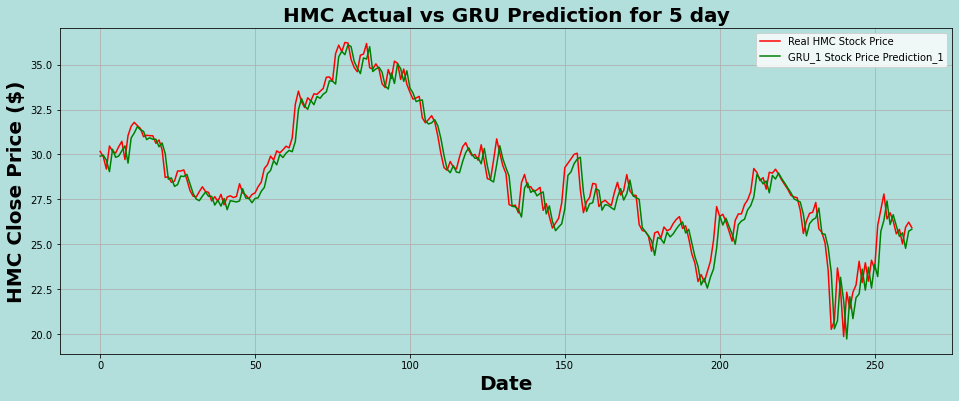

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real HMC Stock Price')
plt.plot(GRU_1_Stock_Price_Prediction_1, color = 'green', label = 'GRU_1 Stock Price Prediction_1')
plt.title('HMC Actual vs GRU Prediction for 5 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 20,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Stock_Price_Prediction_1))

R Squared = 0.9403208100799075


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.5895992098156598


In [ ]:
def mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1): 
    y_test_1, GRU_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - GRU_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 2.140138871230607


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.6418546432806538


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.8011583134940645


# **Medium Flat Dataset 5 Day Stock Price Prediction**


**Datase Details : Oracle Corporation (ORCL)**

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/ORCL.csv', parse_dates=True, index_col=0)
df2.head()

Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-06-30  40.18750  42.2500  40.00000  42.03125  36.270248  38093000
2000-07-03  40.56250  40.8750  39.43750  40.09375  34.598320  42136200
2000-07-05  38.40625  38.8125  36.09375  36.15625  31.200495  94634200
2000-07-06  35.87500  37.9375  35.87500  37.81250  32.629742  50533000
2000-07-07  37.96875  38.5000  37.75000  37.93750  32.737595  31480200

In [ ]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_2_5d = df2.resample('5D').agg(agg_dict)

In [ ]:
print(df_2_5d.head(10))
print('---------')
print(df_2_5d.tail(10))

                Open       High       Low     Close  Adj Close        Volume
Date                                                                        
2000-06-30  40.18750  42.250000  39.43750  40.09375  34.598320  4.011460e+07
2000-07-05  38.40625  38.812500  35.87500  37.93750  32.737595  5.888247e+07
2000-07-10  37.31250  38.312500  35.56250  38.06250  32.845470  3.875696e+07
2000-07-15  37.65625  39.000000  36.50000  36.87500  31.820728  3.130480e+07
2000-07-20  37.40625  39.500000  37.37500  37.50000  32.360065  3.478907e+07
2000-07-25  37.93750  39.000000  35.53125  36.18750  31.227459  3.117175e+07
2000-07-30  35.87500  38.750000  35.68750  38.71875  33.411770  3.496335e+07
2000-08-04  39.15625  41.625000  39.06250  41.50000  35.811806  4.963160e+07
2000-08-09  41.75000  42.140625  39.62500  40.56250  35.002811  2.579627e+07
2000-08-14  40.09375  42.375000  39.93750  40.65625  35.083706  2.739508e+07
---------
                 Open       High        Low      Close  Adj Close 

In [ ]:
df_2_5d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2000-06-30 to 2020-07-20
Freq: 5D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1466 non-null   float64
 1   High       1466 non-null   float64
 2   Low        1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Adj Close  1466 non-null   float64
 5   Volume     1466 non-null   float64
dtypes: float64(6)
memory usage: 120.2 KB


In [ ]:
df_2_5d.describe()

Open         High  ...    Adj Close        Volume
count  1466.000000  1466.000000  ...  1466.000000  1.466000e+03
mean     28.727209    29.391486  ...    26.238159  3.036136e+07
std      13.906603    14.067185  ...    13.863940  1.713965e+07
min       7.830000     8.520000  ...     6.644599  5.690833e+06
25%      15.550000    16.290001  ...    13.362550  1.612714e+07
50%      27.729999    28.760000  ...    24.468790  2.806556e+07
75%      40.189374    40.847501  ...    36.973237  3.988418e+07
max      60.180000    60.500000  ...    58.847672  1.269093e+08

[8 rows x 6 columns]

In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_2_5d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_2_5d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-05    0
2000-07-10    0
2000-07-15    0
2000-07-20    0
Freq: 5D, dtype: int64


In [ ]:
df_2_5d.shape

(1466, 6)

**Open, High, Low, Close Price History**

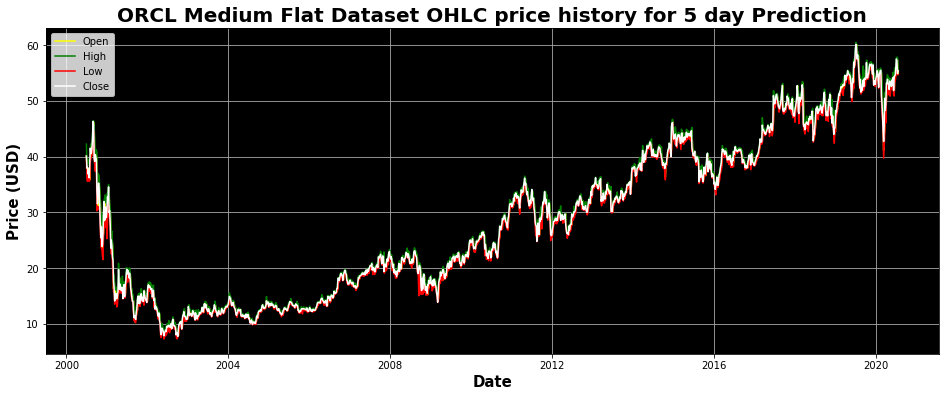

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#000000')
plt.plot(df_2_5d["Open"], color = 'yellow')
plt.plot(df_2_5d["High"], color = 'green')
plt.plot(df_2_5d["Low"], color = 'red')
plt.plot(df_2_5d["Close"],color = 'white')
plt.title('ORCL Medium Flat Dataset OHLC price history for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', color = 'black', fontsize=15,fontweight = "bold")
plt.xlabel('Date',color = 'black',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

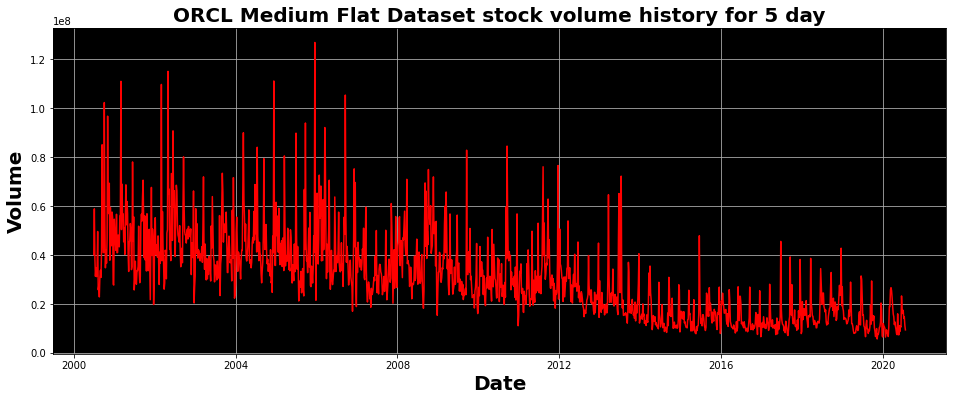

In [ ]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#000000')
plt.plot(df_2_5d["Volume"], color = 'red')
plt.title('ORCL Medium Flat Dataset stock volume history for 5 day', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

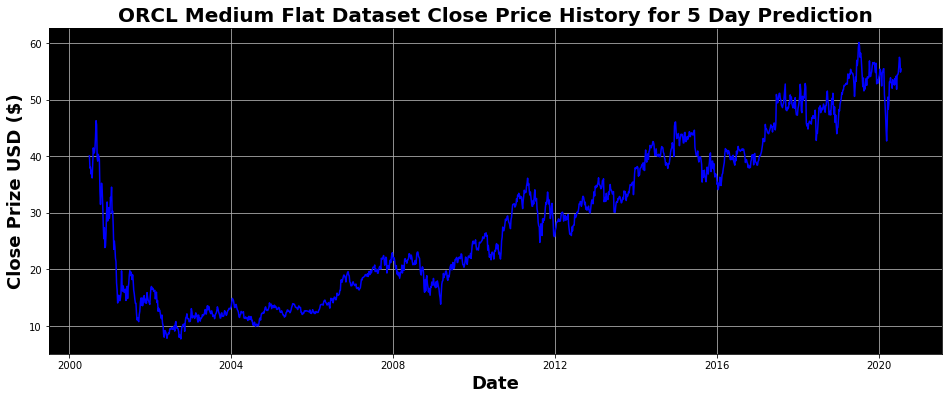

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#000000')
plt.title('ORCL Medium Flat Dataset Close Price History for 5 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_2_5d['Close'], color = 'blue',)
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

In [ ]:
training_2 = df_2_5d[df_2_5d.index < datetime.datetime(year=2016, month=7, day=14)]
training_2

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  40.187500  42.250000  39.437500  40.093750  34.598320  4.011460e+07
2000-07-05  38.406250  38.812500  35.875000  37.937500  32.737595  5.888247e+07
2000-07-10  37.312500  38.312500  35.562500  38.062500  32.845470  3.875696e+07
2000-07-15  37.656250  39.000000  36.500000  36.875000  31.820728  3.130480e+07
2000-07-20  37.406250  39.500000  37.375000  37.500000  32.360065  3.478907e+07
...               ...        ...        ...        ...        ...           ...
2016-06-21  39.930000  40.869999  39.020000  39.230000  36.588497  2.309725e+07
2016-06-26  38.869999  41.160000  38.180000  40.930000  38.174026  2.009190e+07
2016-07-01  40.779999  41.049999  40.150002  40.400002  37.818310  1.194150e+07
2016-07-06  40.200001  41.180000  40.020000  40.869999  38.258286  1.267887e+07
2016-07-11  40.900002  41.910000  40.750000  41.770000  39.100765  1.135436e+07

[1172 rows x 6 columns]

In [ ]:
testing_2 =df_2_5d[df_2_5d.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_2

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2016-07-16  41.709999  41.840000  41.009998  41.250000  38.613995  1.095720e+07
2016-07-21  41.340000  41.509998  40.889999  41.160000  38.529739  1.027513e+07
2016-07-26  41.060001  41.400002  40.720001  41.040001  38.417416  1.271955e+07
2016-07-31  40.910000  41.270000  40.580002  40.900002  38.286358  1.104905e+07
2016-08-05  41.070000  41.400002  40.959999  41.099998  38.473579  1.019227e+07
...               ...        ...        ...        ...        ...           ...
2020-06-30  54.799999  56.430000  54.500000  55.939999  55.704502  1.740720e+07
2020-07-05  56.200001  57.799999  55.990002  57.529999  57.287807  1.420415e+07
2020-07-10  57.470001  57.840000  56.480000  57.200001  57.200001  1.469723e+07
2020-07-15  57.419998  57.840000  54.759998  54.900002  54.900002  1.123163e+07
2020-07-20  54.880001  55.514999  54.695000  55.450001  55.450001  9.410108e+06

[294 rows x 6 columns]

**ORCL Training & Testing Combination for 5 Day**

<function matplotlib.pyplot.show>

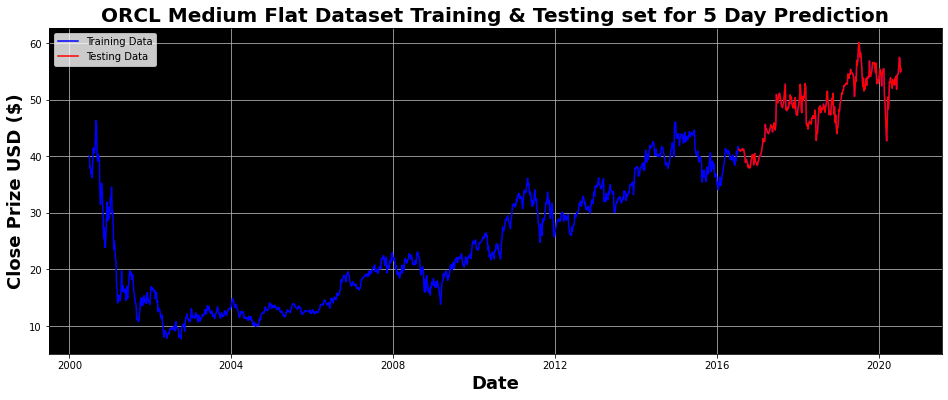

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#FFFFFF')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#000000')
training_2, testing_2 = df_2_5d[df_2_5d.index < datetime.datetime(year=2016, month=7, day=14)], df_2_5d[df_2_5d.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('ORCL Medium Flat Dataset Training & Testing set for 5 Day Prediction', color= 'black',fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18,fontweight = "bold")
plt.plot(df_2_5d['Close'], 'blue', label='Training Data')
plt.plot(testing_2['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [ ]:
training_length_2 = training_2.filter(['Close'])
training_length_2

Close
Date                 
2000-06-30  40.093750
2000-07-05  37.937500
2000-07-10  38.062500
2000-07-15  36.875000
2000-07-20  37.500000
...               ...
2016-06-21  39.230000
2016-06-26  40.930000
2016-07-01  40.400002
2016-07-06  40.869999
2016-07-11  41.770000

[1172 rows x 1 columns]

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-16  41.250000
2016-07-21  41.160000
2016-07-26  41.040001
2016-07-31  40.900002
2016-08-05  41.099998
...               ...
2020-06-30  55.939999
2020-07-05  57.529999
2020-07-10  57.200001
2020-07-15  54.900002
2020-07-20  55.450001

[294 rows x 1 columns]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_2 = sc.fit_transform(training_length_2)
training_length_scaled_2

array([[0.83894464],
       [0.78310133],
       [0.78633862],
       ...,
       [0.84687606],
       [0.85904821],
       [0.88235675]])

In [ ]:
X_train_2 = []
y_train_2 = []
for i in range(30, 1172):
    X_train_2.append(training_length_scaled_2[i-30:i, 0])
    y_train_2.append(training_length_scaled_2[i, 0])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)
print (X_train_2[0])
print ('\n')
print (y_train_2[0])

[0.83894464 0.78310133 0.78633862 0.75558433 0.7717708  0.73777922
 0.80333441 0.8753642  0.85108449 0.85351246 0.87374555 0.9239236
 1.         0.98138556 0.82842344 0.81466494 0.84602624 0.83489803
 0.8203302  0.67627064 0.61638071 0.67303334 0.71349951 0.68598252
 0.61314341 0.52411784 0.45937197 0.50955002 0.41890579 0.42538038]


0.4852703140174814


In [ ]:
X_train_2.shape

(1142, 30)

In [ ]:
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))
X_train_2.shape

(1142, 30, 1)

**Build RNN Model**

In [ ]:
#The RNN Model Build
regressorRNN_2 = Sequential()
regressorRNN_2.add(SimpleRNN(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(SimpleRNN(units=64))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_2.summary()

# Fitting to the training set
history_2 = regressorRNN_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 30, 256)           66048     
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 64)                20544     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 86,657
Trainable params: 86,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 0.2941 - mae: 0.3868 - mse: 0.2941
Epoch 

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-16  41.250000
2016-07-21  41.160000
2016-07-26  41.040001
2016-07-31  40.900002
2016-08-05  41.099998
...               ...
2020-06-30  55.939999
2020-07-05  57.529999
2020-07-10  57.200001
2020-07-15  54.900002
2020-07-20  55.450001

[294 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[39.099998],
       [38.959999],
       [38.82    ],
       [38.450001],
       [38.450001],
       [39.110001],
       [39.259998],
       [39.869999],
       [40.130001],
       [40.110001],
       [40.43    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [43.169998],
       [42.889999],
       [42.599998],
       [42.68    ],
       [45.66    ],
       [44.790001],
       [44.84    ],
       [44.610001],
       [44.18    ],
       [44.169998],
       [44.      ],
       [44.43    ],
       [44.689999],
       [45.049999],
       [45.580002],
       [45.16    ],
       [45.290001],
       [44.310001],
       [45.259998],
       [45.389999],
       [45.919998],
       [45.029999],
       [44.68    ],
       [45.84    ],
       [50.950001],
       [50.139999],
       [49.459999],
       [49.619999],
       [50.560001],
       [51.130001],
       [51.169998],
       [50.299999],
       [49.959999],
       [49.060001],
       [48.849998],
       [48.619999],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.86888961],
       [0.86655876],
       [0.86345098],
       [0.85982524],
       [0.8650048 ],
       [0.86474587],
       [0.87070249],
       [0.86422791],
       [0.87044354],
       [0.86888961],
       [0.85516351],
       [0.84117837],
       [0.8085464 ],
       [0.81657494],
       [0.82201357],
       [0.81035939],
       [0.80310778],
       [0.7854969 ],
       [0.79559723],
       [0.78290709],
       [0.78912264],
       [0.7854969 ],
       [0.81294917],
       [0.82227261],
       [0.84299126],
       [0.83884752],
       [0.84350923],
       [0.79766915],
       [0.84480414],
       [0.84972478],
       [0.81320811],
       [0.80958236],
       [0.80595662],
       [0.79637426],
       [0.79637426],
       [0.81346717],
       [0.81735184],
       [0.83314986],
       [0.83988348],
       [0.83936552],
       [0.84765296],
       [0.85697639],
       [0.87303334],
       [0.8898673 ],
       [0.91861439],
       [0.91136287],
       [0.90385233],
       [0.905

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(264, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.86888961]
  [0.86655876]
  [0.86345098]
  ...
  [0.79766915]
  [0.84480414]
  [0.84972478]]

 [[0.86655876]
  [0.86345098]
  [0.85982524]
  ...
  [0.84480414]
  [0.84972478]
  [0.81320811]]

 [[0.86345098]
  [0.85982524]
  [0.8650048 ]
  ...
  [0.84972478]
  [0.81320811]
  [0.80958236]]

 ...

 [[1.23716416]
  [1.23820001]
  [1.12036255]
  ...
  [1.21877625]
  [1.24933633]
  [1.2905147 ]]

 [[1.23820001]
  [1.12036255]
  [1.08151503]
  ...
  [1.24933633]
  [1.2905147 ]
  [1.2819683 ]]

 [[1.12036255]
  [1.08151503]
  [1.02738748]
  ...
  [1.2905147 ]
  [1.2819683 ]
  [1.22240212]]]


In [ ]:
RNN_2_Stock_Price_Prediction = regressorRNN_2.predict(X_test_2)
RNN_2_Stock_Price_Prediction = sc.inverse_transform(RNN_2_Stock_Price_Prediction)

In [ ]:
print(RNN_2_Stock_Price_Prediction)

[[40.941143]
 [40.00038 ]
 [39.516605]
 [39.417297]
 [39.047066]
 [38.83414 ]
 [39.61444 ]
 [39.658237]
 [40.183453]
 [40.690895]
 [40.78504 ]
 [41.101894]
 [41.374382]
 [41.945133]
 [42.614357]
 [43.43853 ]
 [43.431366]
 [43.14087 ]
 [43.2044  ]
 [45.574173]
 [45.031548]
 [45.247116]
 [44.82807 ]
 [44.587612]
 [44.54945 ]
 [44.542557]
 [44.82454 ]
 [44.60694 ]
 [45.264175]
 [45.89786 ]
 [45.39492 ]
 [45.66196 ]
 [44.779797]
 [45.64435 ]
 [45.629276]
 [46.100353]
 [45.54643 ]
 [45.13438 ]
 [46.06164 ]
 [50.246025]
 [50.178448]
 [49.79339 ]
 [49.51034 ]
 [50.772873]
 [51.38263 ]
 [51.559578]
 [50.539143]
 [49.78357 ]
 [49.359436]
 [49.09742 ]
 [48.63265 ]
 [49.111134]
 [49.312515]
 [50.446133]
 [51.301197]
 [52.49392 ]
 [49.274456]
 [48.85603 ]
 [48.42674 ]
 [48.977367]
 [48.72874 ]
 [48.90441 ]
 [49.42806 ]
 [49.088047]
 [50.941914]
 [50.499607]
 [50.39503 ]
 [49.421963]
 [49.56605 ]
 [49.253086]
 [49.17773 ]
 [49.756638]
 [48.92325 ]
 [50.157455]
 [48.547222]
 [47.73021 ]
 [47.910595]

<function matplotlib.pyplot.show>

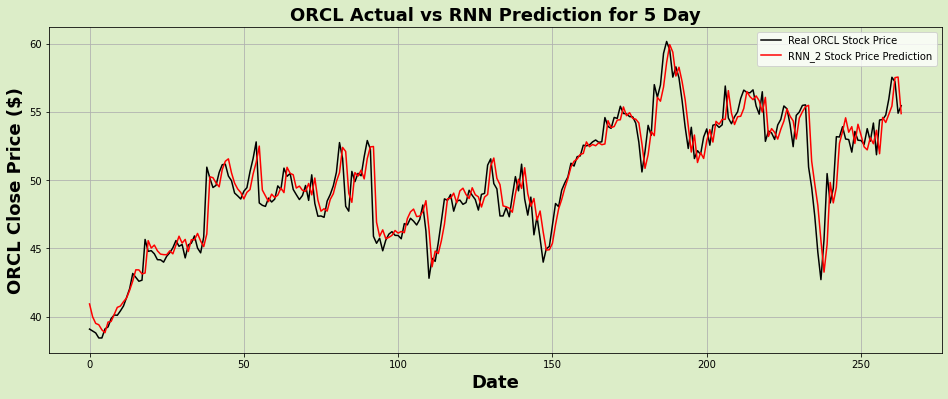

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#dcedc8')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcedc8')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'black', label = 'Real ORCL Stock Price')
plt.plot(RNN_2_Stock_Price_Prediction, color = 'red', label = 'RNN_2 Stock Price Prediction')
plt.title('ORCL Actual vs RNN Prediction for 5 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, RNN_2_Stock_Price_Prediction))

R Squared = 0.9034062353434259


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.9888207774658203


In [ ]:
def mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction): 
    y_test_2, RNN_2_Stock_Price_Prediction = np.array(y_test_2), np.array(RNN_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - RNN_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.9895901806220726


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction))

Mean Squared Error: 1.9143962844825297


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.3836171018321977


**Build LSTM Model**

In [ ]:
#The LSTM Model Build
regressorLSTM_2 = Sequential()
regressorLSTM_2.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(LSTM(units=256))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_2.summary()

# Fitting to the training set
history_2 = regressorLSTM_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 256)           264192    
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0324 - mae: 0.1166 - mse: 0.0324
Epoc

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-16  41.250000
2016-07-21  41.160000
2016-07-26  41.040001
2016-07-31  40.900002
2016-08-05  41.099998
...               ...
2020-06-30  55.939999
2020-07-05  57.529999
2020-07-10  57.200001
2020-07-15  54.900002
2020-07-20  55.450001

[294 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[39.099998],
       [38.959999],
       [38.82    ],
       [38.450001],
       [38.450001],
       [39.110001],
       [39.259998],
       [39.869999],
       [40.130001],
       [40.110001],
       [40.43    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [43.169998],
       [42.889999],
       [42.599998],
       [42.68    ],
       [45.66    ],
       [44.790001],
       [44.84    ],
       [44.610001],
       [44.18    ],
       [44.169998],
       [44.      ],
       [44.43    ],
       [44.689999],
       [45.049999],
       [45.580002],
       [45.16    ],
       [45.290001],
       [44.310001],
       [45.259998],
       [45.389999],
       [45.919998],
       [45.029999],
       [44.68    ],
       [45.84    ],
       [50.950001],
       [50.139999],
       [49.459999],
       [49.619999],
       [50.560001],
       [51.130001],
       [51.169998],
       [50.299999],
       [49.959999],
       [49.060001],
       [48.849998],
       [48.619999],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.86888961],
       [0.86655876],
       [0.86345098],
       [0.85982524],
       [0.8650048 ],
       [0.86474587],
       [0.87070249],
       [0.86422791],
       [0.87044354],
       [0.86888961],
       [0.85516351],
       [0.84117837],
       [0.8085464 ],
       [0.81657494],
       [0.82201357],
       [0.81035939],
       [0.80310778],
       [0.7854969 ],
       [0.79559723],
       [0.78290709],
       [0.78912264],
       [0.7854969 ],
       [0.81294917],
       [0.82227261],
       [0.84299126],
       [0.83884752],
       [0.84350923],
       [0.79766915],
       [0.84480414],
       [0.84972478],
       [0.81320811],
       [0.80958236],
       [0.80595662],
       [0.79637426],
       [0.79637426],
       [0.81346717],
       [0.81735184],
       [0.83314986],
       [0.83988348],
       [0.83936552],
       [0.84765296],
       [0.85697639],
       [0.87303334],
       [0.8898673 ],
       [0.91861439],
       [0.91136287],
       [0.90385233],
       [0.905

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(264, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.86888961]
  [0.86655876]
  [0.86345098]
  ...
  [0.79766915]
  [0.84480414]
  [0.84972478]]

 [[0.86655876]
  [0.86345098]
  [0.85982524]
  ...
  [0.84480414]
  [0.84972478]
  [0.81320811]]

 [[0.86345098]
  [0.85982524]
  [0.8650048 ]
  ...
  [0.84972478]
  [0.81320811]
  [0.80958236]]

 ...

 [[1.23716416]
  [1.23820001]
  [1.12036255]
  ...
  [1.21877625]
  [1.24933633]
  [1.2905147 ]]

 [[1.23820001]
  [1.12036255]
  [1.08151503]
  ...
  [1.24933633]
  [1.2905147 ]
  [1.2819683 ]]

 [[1.12036255]
  [1.08151503]
  [1.02738748]
  ...
  [1.2905147 ]
  [1.2819683 ]
  [1.22240212]]]


In [ ]:
LSTM_2_Stock_Price_Prediction = regressorLSTM_2.predict(X_test_2)
LSTM_2_Stock_Price_Prediction = sc.inverse_transform(LSTM_2_Stock_Price_Prediction)

In [ ]:
print(LSTM_2_Stock_Price_Prediction)

[[40.502266]
 [39.82913 ]
 [39.390015]
 [39.134018]
 [38.834446]
 [38.7263  ]
 [39.10743 ]
 [39.411217]
 [39.90983 ]
 [40.28467 ]
 [40.410797]
 [40.621834]
 [40.910236]
 [41.386963]
 [41.963913]
 [42.851654]
 [43.021282]
 [42.843895]
 [42.773037]
 [44.55564 ]
 [44.78902 ]
 [44.8257  ]
 [44.660114]
 [44.31236 ]
 [44.164684]
 [44.025944]
 [44.259037]
 [44.551388]
 [44.91099 ]
 [45.39502 ]
 [45.333885]
 [45.369926]
 [44.783623]
 [45.121326]
 [45.376553]
 [45.80867 ]
 [45.43057 ]
 [45.037445]
 [45.59926 ]
 [49.061546]
 [49.889267]
 [49.632114]
 [49.54498 ]
 [50.061638]
 [50.588295]
 [50.775593]
 [50.2646  ]
 [49.851437]
 [49.149773]
 [48.79114 ]
 [48.56686 ]
 [48.89769 ]
 [49.241985]
 [50.142735]
 [51.10337 ]
 [52.217056]
 [49.741154]
 [48.686363]
 [48.279213]
 [48.5659  ]
 [48.5417  ]
 [48.682594]
 [49.363087]
 [49.455994]
 [50.46198 ]
 [50.43506 ]
 [50.510662]
 [49.76716 ]
 [49.228184]
 [48.807846]
 [48.856808]
 [49.36211 ]
 [48.882072]
 [49.874096]
 [48.946743]
 [47.984707]
 [47.64419 ]

<function matplotlib.pyplot.show>

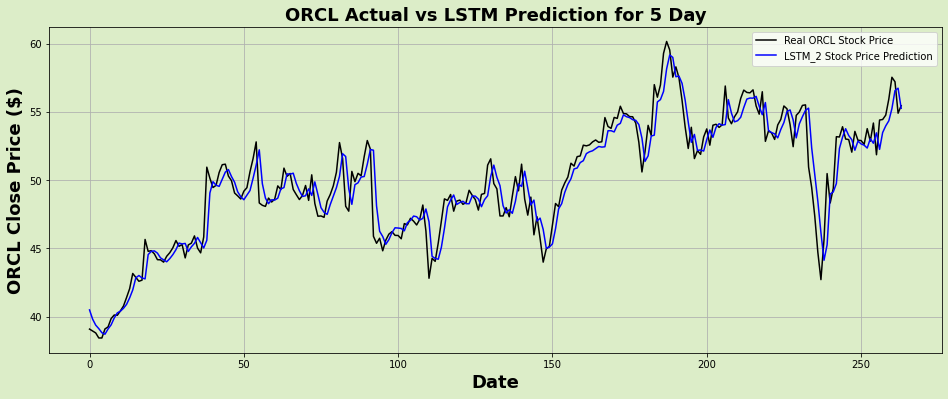

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#dcedc8')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcedc8')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'black', label = 'Real ORCL Stock Price')
plt.plot(LSTM_2_Stock_Price_Prediction, color = 'blue', label = 'LSTM_2 Stock Price Prediction')
plt.title('ORCL Actual vs LSTM Prediction for 5 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, LSTM_2_Stock_Price_Prediction))

R Squared = 0.9015351236896063


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.9862109107166637


In [ ]:
def mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction): 
    y_test_2, LSTM_2_Stock_Price_Prediction = np.array(y_test_2), np.array(LSTM_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - LSTM_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.9787571000482673


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction))

Mean Squared Error: 1.9514799327972994


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.3969538048186487


**Build GRU Model**

In [ ]:
#The GRU Model Build
regressorGRU_2 = Sequential()
regressorGRU_2.add(GRU(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(GRU(units=128))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(Dense(units=1))
# Compiling the LSTM
regressorGRU_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_2.summary()

# Fitting to the training set
history_2 = regressorGRU_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30, 256)           198912    
_________________________________________________________________
dropout_26 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0334 - mae: 0.1264 - mse: 0.0334
Epoc

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-16  41.250000
2016-07-21  41.160000
2016-07-26  41.040001
2016-07-31  40.900002
2016-08-05  41.099998
...               ...
2020-06-30  55.939999
2020-07-05  57.529999
2020-07-10  57.200001
2020-07-15  54.900002
2020-07-20  55.450001

[294 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[39.099998],
       [38.959999],
       [38.82    ],
       [38.450001],
       [38.450001],
       [39.110001],
       [39.259998],
       [39.869999],
       [40.130001],
       [40.110001],
       [40.43    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [43.169998],
       [42.889999],
       [42.599998],
       [42.68    ],
       [45.66    ],
       [44.790001],
       [44.84    ],
       [44.610001],
       [44.18    ],
       [44.169998],
       [44.      ],
       [44.43    ],
       [44.689999],
       [45.049999],
       [45.580002],
       [45.16    ],
       [45.290001],
       [44.310001],
       [45.259998],
       [45.389999],
       [45.919998],
       [45.029999],
       [44.68    ],
       [45.84    ],
       [50.950001],
       [50.139999],
       [49.459999],
       [49.619999],
       [50.560001],
       [51.130001],
       [51.169998],
       [50.299999],
       [49.959999],
       [49.060001],
       [48.849998],
       [48.619999],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.86888961],
       [0.86655876],
       [0.86345098],
       [0.85982524],
       [0.8650048 ],
       [0.86474587],
       [0.87070249],
       [0.86422791],
       [0.87044354],
       [0.86888961],
       [0.85516351],
       [0.84117837],
       [0.8085464 ],
       [0.81657494],
       [0.82201357],
       [0.81035939],
       [0.80310778],
       [0.7854969 ],
       [0.79559723],
       [0.78290709],
       [0.78912264],
       [0.7854969 ],
       [0.81294917],
       [0.82227261],
       [0.84299126],
       [0.83884752],
       [0.84350923],
       [0.79766915],
       [0.84480414],
       [0.84972478],
       [0.81320811],
       [0.80958236],
       [0.80595662],
       [0.79637426],
       [0.79637426],
       [0.81346717],
       [0.81735184],
       [0.83314986],
       [0.83988348],
       [0.83936552],
       [0.84765296],
       [0.85697639],
       [0.87303334],
       [0.8898673 ],
       [0.91861439],
       [0.91136287],
       [0.90385233],
       [0.905

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(264, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.86888961]
  [0.86655876]
  [0.86345098]
  ...
  [0.79766915]
  [0.84480414]
  [0.84972478]]

 [[0.86655876]
  [0.86345098]
  [0.85982524]
  ...
  [0.84480414]
  [0.84972478]
  [0.81320811]]

 [[0.86345098]
  [0.85982524]
  [0.8650048 ]
  ...
  [0.84972478]
  [0.81320811]
  [0.80958236]]

 ...

 [[1.23716416]
  [1.23820001]
  [1.12036255]
  ...
  [1.21877625]
  [1.24933633]
  [1.2905147 ]]

 [[1.23820001]
  [1.12036255]
  [1.08151503]
  ...
  [1.24933633]
  [1.2905147 ]
  [1.2819683 ]]

 [[1.12036255]
  [1.08151503]
  [1.02738748]
  ...
  [1.2905147 ]
  [1.2819683 ]
  [1.22240212]]]


In [ ]:
GRU_2_Stock_Price_Prediction = regressorGRU_2.predict(X_test_2)
GRU_2_Stock_Price_Prediction = sc.inverse_transform(GRU_2_Stock_Price_Prediction)

In [ ]:
print(GRU_2_Stock_Price_Prediction)

[[40.839165]
 [39.69305 ]
 [39.596634]
 [39.394623]
 [39.039955]
 [39.014366]
 [39.56438 ]
 [39.68726 ]
 [40.26448 ]
 [40.512775]
 [40.545193]
 [40.86118 ]
 [41.19118 ]
 [41.767056]
 [42.372475]
 [43.40318 ]
 [43.211903]
 [43.06778 ]
 [43.15733 ]
 [45.771675]
 [44.965122]
 [45.265255]
 [45.05699 ]
 [44.71632 ]
 [44.70749 ]
 [44.52936 ]
 [44.902664]
 [45.107235]
 [45.44818 ]
 [45.933258]
 [45.593403]
 [45.771206]
 [44.894314]
 [45.758476]
 [45.782368]
 [46.303875]
 [45.52848 ]
 [45.290897]
 [46.25984 ]
 [50.662033]
 [49.86682 ]
 [49.771805]
 [49.983025]
 [50.815887]
 [51.312122]
 [51.424545]
 [50.7478  ]
 [50.521965]
 [49.695377]
 [49.505703]
 [49.218742]
 [49.677334]
 [49.842583]
 [50.884724]
 [51.701588]
 [52.837685]
 [49.00637 ]
 [49.157875]
 [48.763916]
 [49.22585 ]
 [48.887012]
 [49.100327]
 [49.908615]
 [49.6533  ]
 [51.111496]
 [50.529236]
 [50.88416 ]
 [49.838253]
 [49.58083 ]
 [49.184856]
 [49.4072  ]
 [49.97954 ]
 [49.009804]
 [50.729282]
 [48.76248 ]
 [48.156826]
 [48.046288]

<function matplotlib.pyplot.show>

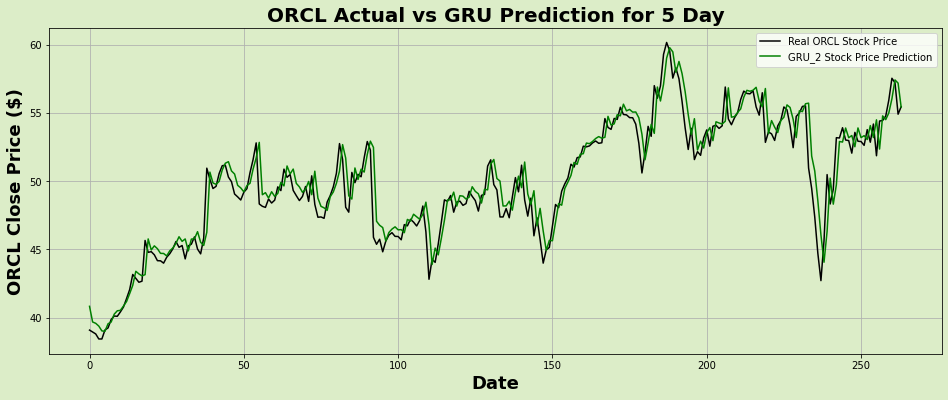

In [ ]:
plt.figure(figsize = (16,6), facecolor ='#dcedc8')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcedc8')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'black', label = 'Real ORCL Stock Price')
plt.plot(GRU_2_Stock_Price_Prediction, color = 'green', label = 'GRU_2 Stock Price Prediction')
plt.title('ORCL Actual vs GRU Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, GRU_2_Stock_Price_Prediction))

R Squared = 0.900011208302807


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.9996204064007383


In [ ]:
def mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction): 
    y_test_2, GRU_2_Stock_Price_Prediction = np.array(y_test_2), np.array(GRU_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - GRU_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 2.019202869456731


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction))

Mean Squared Error: 1.9816824822550914


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.4077224450349193


# **Fluctuate Dataset 5 Day Stock Price Prediction**

**Dataset Details : Intuit Inc. (INTU)**

In [3]:
df3 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/INTU.csv', parse_dates=True, index_col=0)
df3.head()

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2000-06-30  21.00000  21.00000  19.96875  20.68750  18.821939  5701200
2000-07-03  20.53125  20.62500  20.12500  20.15625  18.338593   871000
2000-07-05  20.31250  22.46875  20.00000  22.03125  20.044516  7936600
2000-07-06  22.00000  22.43750  21.06250  22.37500  20.357264  4842000
2000-07-07  22.43750  22.75000  22.06250  22.21875  20.215105  3339600

In [4]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_3_5d = df3.resample('5D').agg(agg_dict)

In [5]:
print(df_3_5d.head(10))
print('---------')
print(df_3_5d.tail(10))

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-06-30  21.00000  21.00000  19.96875  20.15625  18.338593  3.286100e+06
2000-07-05  20.31250  22.75000  20.00000  22.21875  20.215105  5.372733e+06
2000-07-10  22.03125  23.09375  20.56250  21.12500  19.219984  4.668200e+06
2000-07-15  21.03125  21.06250  19.40625  19.53125  17.769957  3.994200e+06
2000-07-20  19.90625  20.25000  18.31250  18.56250  16.888573  3.800267e+06
2000-07-25  18.65625  19.09375  16.50000  16.56250  15.068923  3.556050e+06
2000-07-30  16.90625  20.37500  16.12500  19.50000  17.741531  6.636950e+06
2000-08-04  20.00000  21.50000  19.09375  21.09375  19.191563  2.989000e+06
2000-08-09  21.37500  21.50000  19.81250  20.43750  18.594479  2.592200e+06
2000-08-14  20.56250  24.00000  19.96875  23.46875  21.352388  3.887040e+06
---------
                  Open        High  ...   Adj Close        Volume
Date        

In [6]:
df_3_5d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2000-06-30 to 2020-07-20
Freq: 5D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1466 non-null   float64
 1   High       1466 non-null   float64
 2   Low        1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Adj Close  1466 non-null   float64
 5   Volume     1466 non-null   float64
dtypes: float64(6)
memory usage: 120.2 KB


In [7]:
df_3_5d.describe()

Open         High  ...    Adj Close        Volume
count  1466.000000  1466.000000  ...  1466.000000  1.466000e+03
mean     73.217387    74.932583  ...    70.393611  3.339010e+06
std      71.510547    73.163270  ...    71.737678  2.578566e+06
min      13.906250    14.875000  ...    12.623779  4.955500e+05
25%      24.383749    25.065001  ...    22.122038  1.614304e+06
50%      36.925002    37.910000  ...    34.154720  2.717800e+06
75%      96.920000    98.575001  ...    92.308920  4.240725e+06
max     308.000000   314.730011  ...   307.910004  3.462607e+07

[8 rows x 6 columns]

In [8]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_3_5d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_3_5d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-05    0
2000-07-10    0
2000-07-15    0
2000-07-20    0
Freq: 5D, dtype: int64


In [9]:
df_3_5d.shape

(1466, 6)

**Open, High, Low, Close Price History**

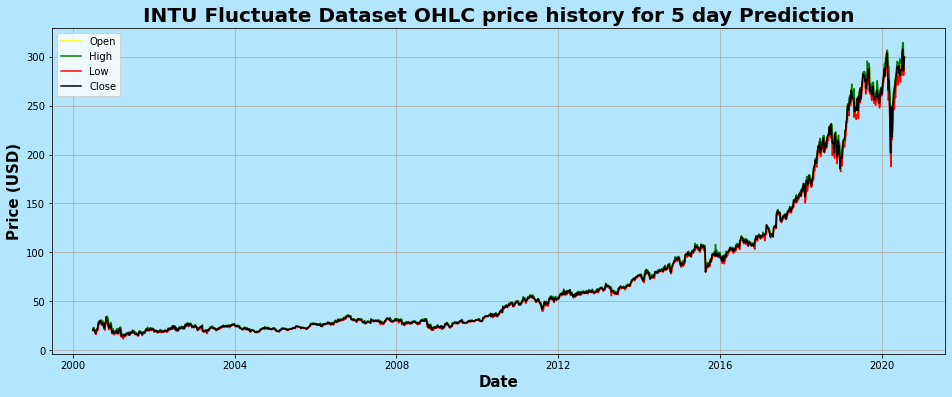

In [10]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#b3e5fc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b3e5fc')
plt.plot(df_3_5d["Open"], color = 'yellow')
plt.plot(df_3_5d["High"], color = 'green')
plt.plot(df_3_5d["Low"], color = 'red')
plt.plot(df_3_5d["Close"],color = 'black')
plt.title('INTU Fluctuate Dataset OHLC price history for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', color = 'black', fontsize=15,fontweight = "bold")
plt.xlabel('Date',color = 'black',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

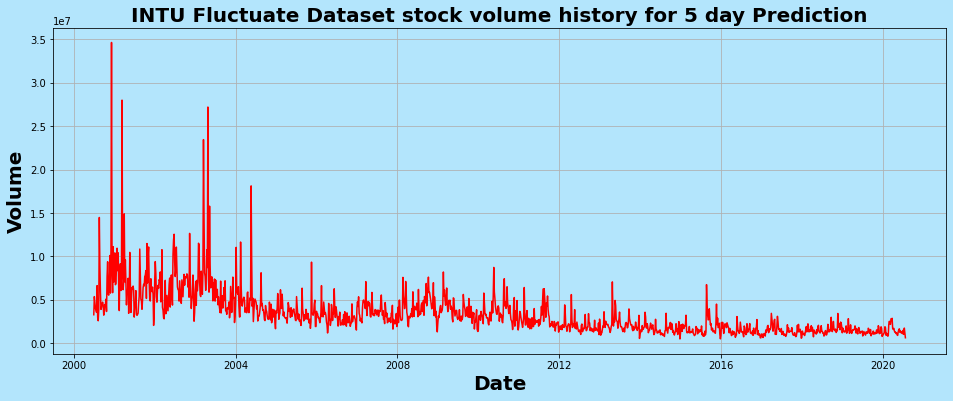

In [11]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#b3e5fc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b3e5fc')
plt.plot(df_3_5d["Volume"], color = 'red')
plt.title('INTU Fluctuate Dataset stock volume history for 5 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Close Price History**

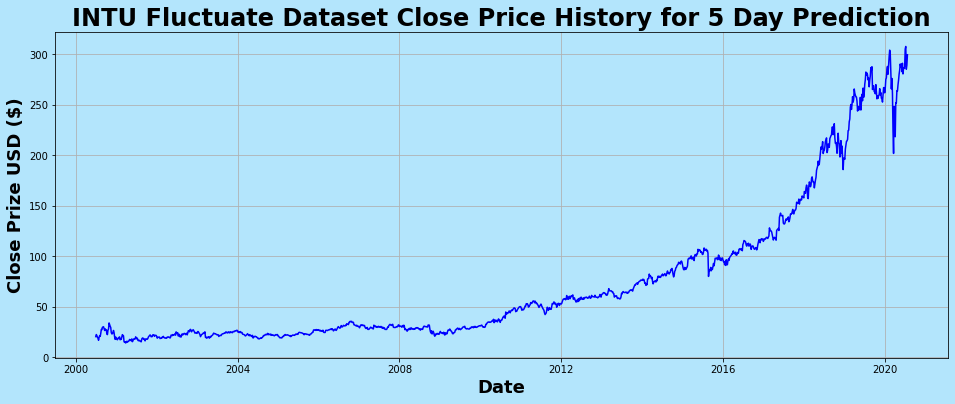

In [12]:
plt.figure(figsize = (16,6), facecolor = '#b3e5fc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b3e5fc')
plt.title('INTU Fluctuate Dataset Close Price History for 5 Day Prediction',fontsize=24,fontweight= 'bold')
plt.plot(df_3_5d['Close'], color = 'blue',)
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

In [13]:
training_3 = df_3_5d[df_3_5d.index < datetime.datetime(year=2016, month=7, day=14)]
training_3

Open        High  ...   Adj Close        Volume
Date                                ...                          
2000-06-30   21.000000   21.000000  ...   18.338593  3.286100e+06
2000-07-05   20.312500   22.750000  ...   20.215105  5.372733e+06
2000-07-10   22.031250   23.093750  ...   19.219984  4.668200e+06
2000-07-15   21.031250   21.062500  ...   17.769957  3.994200e+06
2000-07-20   19.906250   20.250000  ...   16.888573  3.800267e+06
...                ...         ...  ...         ...           ...
2016-06-21  107.629997  108.949997  ...  101.264824  2.435000e+06
2016-06-26  104.239998  111.790001  ...  107.302444  1.812575e+06
2016-07-01  111.730003  113.019997  ...  108.388840  1.297850e+06
2016-07-06  112.040001  116.029999  ...  111.315399  1.303467e+06
2016-07-11  116.050003  116.970001  ...  110.833405  1.348420e+06

[1172 rows x 6 columns]

In [14]:
testing_3 =df_3_5d[df_3_5d.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_3

Open        High  ...   Adj Close        Volume
Date                                ...                          
2016-07-16  114.889999  115.750000  ...  110.650269  1.052700e+06
2016-07-21  114.480003  114.489998  ...  109.840569  7.485000e+05
2016-07-26  114.129997  114.620003  ...  106.987312  1.989875e+06
2016-07-31  111.419998  111.769997  ...  105.936623  1.814650e+06
2016-08-05  110.050003  112.760002  ...  108.086212  1.136133e+06
...                ...         ...  ...         ...           ...
2020-06-30  289.149994  307.779999  ...  304.778656  1.501233e+06
2020-07-05  308.000000  314.730011  ...  307.910004  1.024225e+06
2020-07-10  307.779999  311.230011  ...  285.369995  1.750533e+06
2020-07-15  288.029999  290.880005  ...  289.269989  1.183633e+06
2020-07-20  289.500000  299.709991  ...  299.700012  6.354670e+05

[294 rows x 6 columns]

**INTU Training & Testing History for 5 Day**

<function matplotlib.pyplot.show>

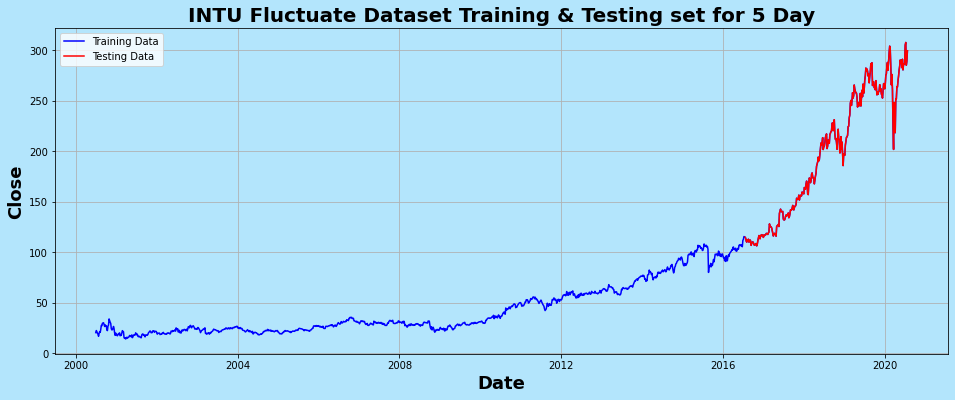

In [15]:
plt.figure(figsize = (16,6), facecolor = '#b3e5fc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b3e5fc')
training_3, testing_3 = df_3_5d[df_3_5d.index < datetime.datetime(year=2016, month=7, day=14)], df_3_5d[df_3_5d.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('INTU Fluctuate Dataset Training & Testing set for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot(df_3_5d['Close'], 'blue', label='Training Data')
plt.plot(testing_3['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [16]:
training_length_3 = training_3.filter(['Close'])
training_length_3

Close
Date                  
2000-06-30   20.156250
2000-07-05   22.218750
2000-07-10   21.125000
2000-07-15   19.531250
2000-07-20   18.562500
...                ...
2016-06-21  105.330002
2016-06-26  111.610001
2016-07-01  112.739998
2016-07-06  115.480003
2016-07-11  114.980003

[1172 rows x 1 columns]

In [17]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-16  114.790001
2016-07-21  113.949997
2016-07-26  110.989998
2016-07-31  109.900002
2016-08-05  112.129997
...                ...
2020-06-30  305.299988
2020-07-05  307.910004
2020-07-10  285.369995
2020-07-15  289.269989
2020-07-20  299.700012

[294 rows x 1 columns]

In [18]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_3 = sc.fit_transform(training_length_3)
training_length_scaled_3

array([[0.06182028],
       [0.08211948],
       [0.07135475],
       ...,
       [0.97303277],
       [1.        ],
       [0.99507898]])

In [19]:
X_train_3 = []
y_train_3 = []
for i in range(30, 1172):
    X_train_3.append(training_length_scaled_3[i-30:i, 0])
    y_train_3.append(training_length_scaled_3[i, 0])
X_train_3, y_train_3 = np.array(X_train_3), np.array(y_train_3)
print (X_train_3[0])
print ('\n')
print (y_train_3[0])

[0.06182028 0.08211948 0.07135475 0.05566901 0.04613454 0.02645047
 0.05536145 0.07104719 0.06458835 0.09442202 0.13225235 0.12856158
 0.15347423 0.15562718 0.15839525 0.14055656 0.12179518 0.13778849
 0.12948427 0.12856158 0.08796319 0.08181192 0.12487082 0.13655824
 0.19561045 0.17777176 0.16300871 0.15162885 0.1005733  0.08857832]


0.09011613335614979


In [20]:
X_train_3.shape

(1142, 30)

In [21]:
X_train_3 = np.reshape(X_train_3, (X_train_3.shape[0], X_train_3.shape[1], 1))
X_train_3.shape

(1142, 30, 1)

**Build RNN Model**

In [167]:
#The RNN Model Build
regressorRNN_3 = Sequential()
regressorRNN_3.add(SimpleRNN(units=256, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(SimpleRNN(units=128))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_3.summary()

# Fitting to the training set
history_3 = regressorRNN_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_30 (SimpleRNN)    (None, 30, 256)           66048     
_________________________________________________________________
dropout_30 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
simple_rnn_31 (SimpleRNN)    (None, 128)               49280     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 115,457
Trainable params: 115,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 40ms/step - loss: 0.2962 - mae: 0.3180 - mse: 0.2962
Epoc

In [168]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-16  114.790001
2016-07-21  113.949997
2016-07-26  110.989998
2016-07-31  109.900002
2016-08-05  112.129997
...                ...
2020-06-30  305.299988
2020-07-05  307.910004
2020-07-10  285.369995
2020-07-15  289.269989
2020-07-20  299.700012

[294 rows x 1 columns]

In [169]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[117.309998],
       [116.910004],
       [116.900002],
       [114.610001],
       [116.860001],
       [116.379997],
       [117.099998],
       [117.099998],
       [118.459999],
       [118.580002],
       [118.370003],
       [117.529999],
       [118.949997],
       [119.860001],
       [128.009995],
       [125.169998],
       [125.400002],
       [124.940002],
       [123.919998],
       [121.120003],
       [118.449997],
       [115.989998],
       [117.809998],
       [118.68    ],
       [117.889999],
       [118.360001],
       [115.809998],
       [125.519997],
       [126.139999],
       [126.879997],
       [127.5     ],
       [125.379997],
       [138.559998],
       [140.639999],
       [142.649994],
       [140.210007],
       [140.      ],
       [140.169998],
       [140.399994],
       [132.809998],
       [131.979996],
       [131.869995],
       [132.880005],
       [135.350006],
       [136.839996],
       [135.639999],
       [136.899994],
       [136.8

In [170]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.99320898],
       [0.98494163],
       [0.95580921],
       [0.94508143],
       [0.96702912],
       [0.96663543],
       [0.97362335],
       [0.94458929],
       [0.95354558],
       [0.96643863],
       [0.95551396],
       [0.91358687],
       [0.93622358],
       [0.94508143],
       [0.94783718],
       [0.93779835],
       [0.9209684 ],
       [0.91457114],
       [0.91801584],
       [0.93081043],
       [0.92805467],
       [0.90866586],
       [0.92539736],
       [0.9596476 ],
       [0.98346538],
       [1.0093499 ],
       [1.00580677],
       [0.97815067],
       [1.01112148],
       [1.00541308],
       [1.01801087],
       [1.01407412],
       [1.01397568],
       [0.99143741],
       [1.01358199],
       [1.00885777],
       [1.01594405],
       [1.01594405],
       [1.02932923],
       [1.0305103 ],
       [1.02844348],
       [1.02017613],
       [1.0341518 ],
       [1.04310809],
       [1.12332062],
       [1.09536927],
       [1.09763298],
       [1.093

In [171]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(264, 30)

In [172]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.99320898]
  [0.98494163]
  [0.95580921]
  ...
  [0.97815067]
  [1.01112148]
  [1.00541308]]

 [[0.98494163]
  [0.95580921]
  [0.94508143]
  ...
  [1.01112148]
  [1.00541308]
  [1.01801087]]

 [[0.95580921]
  [0.94508143]
  [0.96702912]
  ...
  [1.00541308]
  [1.01801087]
  [1.01407412]]

 ...

 [[2.8582747 ]
  [2.8282563 ]
  [2.66645323]
  ...
  [2.69716062]
  [2.86821494]
  [2.89390281]]

 [[2.8282563 ]
  [2.66645323]
  [2.47994684]
  ...
  [2.86821494]
  [2.89390281]
  [2.67206325]]

 [[2.66645323]
  [2.47994684]
  [2.58161493]
  ...
  [2.89390281]
  [2.67206325]
  [2.71044713]]]


In [173]:
RNN_3_Stock_Price_Prediction = regressorRNN_3.predict(X_test_3)
RNN_3_Stock_Price_Prediction = sc.inverse_transform(RNN_3_Stock_Price_Prediction)

In [174]:
print(RNN_3_Stock_Price_Prediction)

[[117.17367 ]
 [117.58087 ]
 [117.36606 ]
 [116.85285 ]
 [115.22588 ]
 [117.61471 ]
 [117.2398  ]
 [117.15526 ]
 [117.34971 ]
 [118.87067 ]
 [118.96141 ]
 [118.598526]
 [118.09594 ]
 [118.89231 ]
 [119.717705]
 [126.50844 ]
 [125.314095]
 [124.91914 ]
 [125.06314 ]
 [124.21301 ]
 [121.25136 ]
 [119.053116]
 [115.69593 ]
 [117.21843 ]
 [119.099785]
 [118.58105 ]
 [118.7877  ]
 [116.70639 ]
 [124.36872 ]
 [126.01607 ]
 [126.95468 ]
 [127.161446]
 [126.15336 ]
 [134.9894  ]
 [139.75438 ]
 [140.1042  ]
 [138.73723 ]
 [139.33075 ]
 [138.74673 ]
 [139.8753  ]
 [132.72104 ]
 [130.3575  ]
 [130.48364 ]
 [131.63724 ]
 [134.6693  ]
 [135.98317 ]
 [134.86618 ]
 [136.5568  ]
 [136.59866 ]
 [137.754   ]
 [134.39789 ]
 [133.72182 ]
 [136.249   ]
 [139.74873 ]
 [139.7495  ]
 [140.91614 ]
 [141.06006 ]
 [144.539   ]
 [142.1668  ]
 [140.33138 ]
 [142.02016 ]
 [142.72559 ]
 [144.13799 ]
 [145.77547 ]
 [150.71297 ]
 [150.48125 ]
 [151.27794 ]
 [151.57762 ]
 [154.27492 ]
 [150.03647 ]
 [152.21346 ]
 [152.

<function matplotlib.pyplot.show>

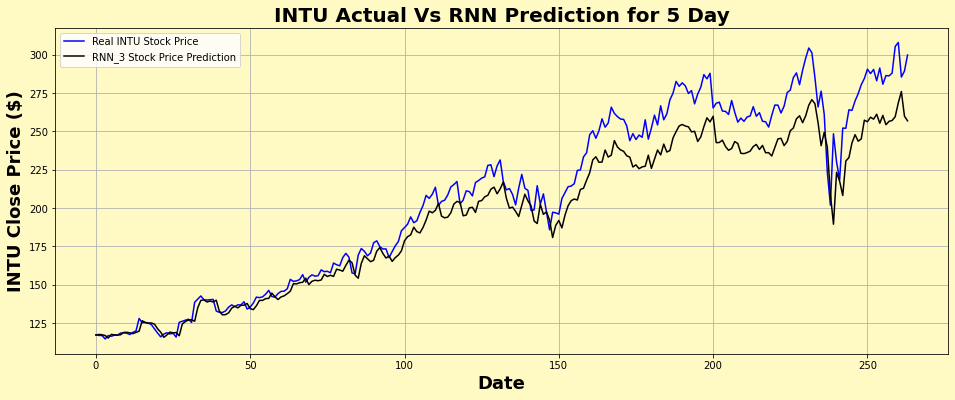

In [175]:
plt.figure(figsize = (16,6), facecolor = '#fff9c4')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff9c4')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'blue', label = 'Real INTU Stock Price')
plt.plot(RNN_3_Stock_Price_Prediction, color = 'black', label = 'RNN_3 Stock Price Prediction')
plt.title('INTU Actual Vs RNN Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [176]:
print ('R Squared =',r2_score(y_test_3, RNN_3_Stock_Price_Prediction))

R Squared = 0.9040506760047018


In [177]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Error: 13.575457713532417


In [178]:
def mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction): 
    y_test_3, RNN_3_Stock_Price_Prediction = np.array(y_test_3), np.array(RNN_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - RNN_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 5.653413571201203


In [179]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction))

Mean Squared Error: 317.97174783974793


In [180]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction)))

Root Mean Squared Error: 17.831762331293785


**Build LSTM Model**

In [ ]:
#The LSTM Model Build
regressorLSTM_3 = Sequential()
regressorLSTM_3.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(LSTM(units=512))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_3.summary()

# Fitting to the training set
history_3 = regressorLSTM_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_58 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 513       
Total params: 1,839,617
Trainable params: 1,839,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0312 - mae: 0.1129 - mse: 0.0312


In [ ]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-16  114.790001
2016-07-21  113.949997
2016-07-26  110.989998
2016-07-31  109.900002
2016-08-05  112.129997
...                ...
2020-06-30  305.299988
2020-07-05  307.910004
2020-07-10  285.369995
2020-07-15  289.269989
2020-07-20  299.700012

[294 rows x 1 columns]

In [ ]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[117.309998],
       [116.910004],
       [116.900002],
       [114.610001],
       [116.860001],
       [116.379997],
       [117.099998],
       [117.099998],
       [118.459999],
       [118.580002],
       [118.370003],
       [117.529999],
       [118.949997],
       [119.860001],
       [128.009995],
       [125.169998],
       [125.400002],
       [124.940002],
       [123.919998],
       [121.120003],
       [118.449997],
       [115.989998],
       [117.809998],
       [118.68    ],
       [117.889999],
       [118.360001],
       [115.809998],
       [125.519997],
       [126.139999],
       [126.879997],
       [127.5     ],
       [125.379997],
       [138.559998],
       [140.639999],
       [142.649994],
       [140.210007],
       [140.      ],
       [140.169998],
       [140.399994],
       [132.809998],
       [131.979996],
       [131.869995],
       [132.880005],
       [135.350006],
       [136.839996],
       [135.639999],
       [136.899994],
       [136.8

In [ ]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.99320898],
       [0.98494163],
       [0.95580921],
       [0.94508143],
       [0.96702912],
       [0.96663543],
       [0.97362335],
       [0.94458929],
       [0.95354558],
       [0.96643863],
       [0.95551396],
       [0.91358687],
       [0.93622358],
       [0.94508143],
       [0.94783718],
       [0.93779835],
       [0.9209684 ],
       [0.91457114],
       [0.91801584],
       [0.93081043],
       [0.92805467],
       [0.90866586],
       [0.92539736],
       [0.9596476 ],
       [0.98346538],
       [1.0093499 ],
       [1.00580677],
       [0.97815067],
       [1.01112148],
       [1.00541308],
       [1.01801087],
       [1.01407412],
       [1.01397568],
       [0.99143741],
       [1.01358199],
       [1.00885777],
       [1.01594405],
       [1.01594405],
       [1.02932923],
       [1.0305103 ],
       [1.02844348],
       [1.02017613],
       [1.0341518 ],
       [1.04310809],
       [1.12332062],
       [1.09536927],
       [1.09763298],
       [1.093

In [ ]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(264, 30)

In [ ]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.99320898]
  [0.98494163]
  [0.95580921]
  ...
  [0.97815067]
  [1.01112148]
  [1.00541308]]

 [[0.98494163]
  [0.95580921]
  [0.94508143]
  ...
  [1.01112148]
  [1.00541308]
  [1.01801087]]

 [[0.95580921]
  [0.94508143]
  [0.96702912]
  ...
  [1.00541308]
  [1.01801087]
  [1.01407412]]

 ...

 [[2.8582747 ]
  [2.8282563 ]
  [2.66645323]
  ...
  [2.69716062]
  [2.86821494]
  [2.89390281]]

 [[2.8282563 ]
  [2.66645323]
  [2.47994684]
  ...
  [2.86821494]
  [2.89390281]
  [2.67206325]]

 [[2.66645323]
  [2.47994684]
  [2.58161493]
  ...
  [2.89390281]
  [2.67206325]
  [2.71044713]]]


In [ ]:
LSTM_3_Stock_Price_Prediction = regressorLSTM_3.predict(X_test_3)
LSTM_3_Stock_Price_Prediction = sc.inverse_transform(LSTM_3_Stock_Price_Prediction)

In [ ]:
print(LSTM_3_Stock_Price_Prediction)

[[116.80872 ]
 [117.40038 ]
 [117.67444 ]
 [117.7814  ]
 [116.862274]
 [117.09612 ]
 [117.32005 ]
 [117.81191 ]
 [118.18704 ]
 [118.97431 ]
 [119.5697  ]
 [119.7763  ]
 [119.43914 ]
 [119.71798 ]
 [120.394325]
 [124.34858 ]
 [126.062744]
 [126.607056]
 [126.35195 ]
 [125.531044]
 [123.73843 ]
 [121.42306 ]
 [119.039635]
 [118.55758 ]
 [119.2097  ]
 [119.63103 ]
 [120.08886 ]
 [119.2867  ]
 [122.65409 ]
 [125.693695]
 [127.60225 ]
 [128.54834 ]
 [127.807625]
 [132.58015 ]
 [137.22615 ]
 [140.58571 ]
 [140.93457 ]
 [140.26546 ]
 [139.66403 ]
 [139.46613 ]
 [136.26297 ]
 [133.68163 ]
 [132.48932 ]
 [132.78473 ]
 [134.54236 ]
 [136.61487 ]
 [137.3613  ]
 [138.01193 ]
 [138.235   ]
 [139.09943 ]
 [137.57932 ]
 [136.749   ]
 [137.55766 ]
 [140.0646  ]
 [141.66797 ]
 [142.55473 ]
 [143.56995 ]
 [145.17445 ]
 [144.3616  ]
 [143.20273 ]
 [143.48524 ]
 [144.61687 ]
 [145.53046 ]
 [146.70311 ]
 [150.09094 ]
 [151.76335 ]
 [152.44247 ]
 [152.86024 ]
 [154.405   ]
 [153.2618  ]
 [153.5303  ]
 [154.

<function matplotlib.pyplot.show>

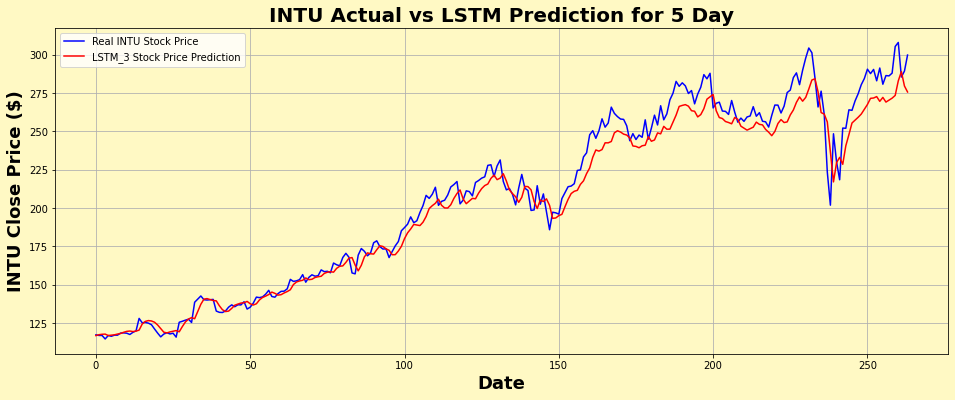

In [ ]:
plt.figure(figsize = (16,6), facecolor ='#fff9c4')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff9c4')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'blue', label = 'Real INTU Stock Price')
plt.plot(LSTM_3_Stock_Price_Prediction, color = 'red', label = 'LSTM_3 Stock Price Prediction')
plt.title('INTU Actual vs LSTM Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_3, LSTM_3_Stock_Price_Prediction))

R Squared = 0.966413851234831


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Error: 7.835213644370339


In [ ]:
def mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction): 
    y_test_3, LSTM_3_Stock_Price_Prediction = np.array(y_test_3), np.array(LSTM_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - LSTM_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 3.4130638475256116


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction))

Mean Squared Error: 111.3029876749304


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction)))

Root Mean Squared Error: 10.550023112530626


**Build GRU Model**

In [ ]:
#The GRU Model Build
regressorGRU_3 = Sequential()
regressorGRU_3.add(GRU(units=1024, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(GRU(units=512))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(Dense(units=1))
# Compiling the GRU
regressorGRU_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_3.summary()

# Fitting to the training set
history_3 = regressorGRU_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 30, 1024)          3154944   
_________________________________________________________________
dropout_60 (Dropout)         (None, 30, 1024)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 512)               2362368   
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 513       
Total params: 5,517,825
Trainable params: 5,517,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 0.0130 - mae: 0.0615 - mse: 0.0130


In [ ]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-16  114.790001
2016-07-21  113.949997
2016-07-26  110.989998
2016-07-31  109.900002
2016-08-05  112.129997
...                ...
2020-06-30  305.299988
2020-07-05  307.910004
2020-07-10  285.369995
2020-07-15  289.269989
2020-07-20  299.700012

[294 rows x 1 columns]

In [ ]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[117.309998],
       [116.910004],
       [116.900002],
       [114.610001],
       [116.860001],
       [116.379997],
       [117.099998],
       [117.099998],
       [118.459999],
       [118.580002],
       [118.370003],
       [117.529999],
       [118.949997],
       [119.860001],
       [128.009995],
       [125.169998],
       [125.400002],
       [124.940002],
       [123.919998],
       [121.120003],
       [118.449997],
       [115.989998],
       [117.809998],
       [118.68    ],
       [117.889999],
       [118.360001],
       [115.809998],
       [125.519997],
       [126.139999],
       [126.879997],
       [127.5     ],
       [125.379997],
       [138.559998],
       [140.639999],
       [142.649994],
       [140.210007],
       [140.      ],
       [140.169998],
       [140.399994],
       [132.809998],
       [131.979996],
       [131.869995],
       [132.880005],
       [135.350006],
       [136.839996],
       [135.639999],
       [136.899994],
       [136.8

In [ ]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.99320898],
       [0.98494163],
       [0.95580921],
       [0.94508143],
       [0.96702912],
       [0.96663543],
       [0.97362335],
       [0.94458929],
       [0.95354558],
       [0.96643863],
       [0.95551396],
       [0.91358687],
       [0.93622358],
       [0.94508143],
       [0.94783718],
       [0.93779835],
       [0.9209684 ],
       [0.91457114],
       [0.91801584],
       [0.93081043],
       [0.92805467],
       [0.90866586],
       [0.92539736],
       [0.9596476 ],
       [0.98346538],
       [1.0093499 ],
       [1.00580677],
       [0.97815067],
       [1.01112148],
       [1.00541308],
       [1.01801087],
       [1.01407412],
       [1.01397568],
       [0.99143741],
       [1.01358199],
       [1.00885777],
       [1.01594405],
       [1.01594405],
       [1.02932923],
       [1.0305103 ],
       [1.02844348],
       [1.02017613],
       [1.0341518 ],
       [1.04310809],
       [1.12332062],
       [1.09536927],
       [1.09763298],
       [1.093

In [ ]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(264, 30)

In [ ]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.99320898]
  [0.98494163]
  [0.95580921]
  ...
  [0.97815067]
  [1.01112148]
  [1.00541308]]

 [[0.98494163]
  [0.95580921]
  [0.94508143]
  ...
  [1.01112148]
  [1.00541308]
  [1.01801087]]

 [[0.95580921]
  [0.94508143]
  [0.96702912]
  ...
  [1.00541308]
  [1.01801087]
  [1.01407412]]

 ...

 [[2.8582747 ]
  [2.8282563 ]
  [2.66645323]
  ...
  [2.69716062]
  [2.86821494]
  [2.89390281]]

 [[2.8282563 ]
  [2.66645323]
  [2.47994684]
  ...
  [2.86821494]
  [2.89390281]
  [2.67206325]]

 [[2.66645323]
  [2.47994684]
  [2.58161493]
  ...
  [2.89390281]
  [2.67206325]
  [2.71044713]]]


In [ ]:
GRU_3_Stock_Price_Prediction = regressorGRU_3.predict(X_test_3)
GRU_3_Stock_Price_Prediction = sc.inverse_transform(GRU_3_Stock_Price_Prediction)

In [ ]:
print(GRU_3_Stock_Price_Prediction)

[[115.78314 ]
 [116.85882 ]
 [116.689354]
 [116.66909 ]
 [114.73008 ]
 [116.38086 ]
 [116.15053 ]
 [116.74311 ]
 [116.841995]
 [118.013824]
 [118.27789 ]
 [118.156555]
 [117.445305]
 [118.54938 ]
 [119.4472  ]
 [126.46523 ]
 [125.0471  ]
 [125.1951  ]
 [124.867874]
 [123.92244 ]
 [121.42691 ]
 [118.80516 ]
 [116.305885]
 [117.44006 ]
 [118.26182 ]
 [117.71359 ]
 [118.0835  ]
 [115.971756]
 [123.92626 ]
 [125.44595 ]
 [126.40856 ]
 [127.18337 ]
 [125.52088 ]
 [136.34561 ]
 [139.50397 ]
 [141.83961 ]
 [140.37935 ]
 [140.04364 ]
 [140.09639 ]
 [140.2472  ]
 [134.00815 ]
 [132.39287 ]
 [131.91287 ]
 [132.57185 ]
 [134.71623 ]
 [136.28528 ]
 [135.5869  ]
 [136.59402 ]
 [136.6669  ]
 [138.3972  ]
 [134.71317 ]
 [135.22052 ]
 [137.44026 ]
 [140.93575 ]
 [141.23889 ]
 [141.81297 ]
 [143.37099 ]
 [145.67267 ]
 [142.77711 ]
 [142.03403 ]
 [143.77815 ]
 [145.17598 ]
 [145.52979 ]
 [146.91681 ]
 [152.16164 ]
 [151.93285 ]
 [152.35274 ]
 [153.11296 ]
 [155.85126 ]
 [152.32623 ]
 [154.3979  ]
 [155.

<function matplotlib.pyplot.show>

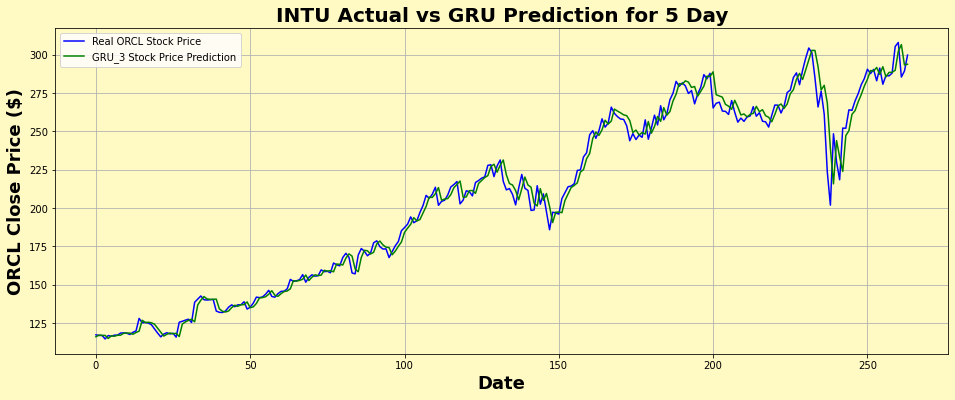

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#fff9c4')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff9c4')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'blue', label = 'Real ORCL Stock Price')
plt.plot(GRU_3_Stock_Price_Prediction, color = 'green', label = 'GRU_3 Stock Price Prediction')
plt.title('INTU Actual vs GRU Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show


In [ ]:
print ('R Squared =',r2_score(y_test_3, GRU_3_Stock_Price_Prediction))

R Squared = 0.982271331198829


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Error: 4.990388532553932


In [ ]:
def mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction): 
    y_test_3, GRU_3_Stock_Price_Prediction = np.array(y_test_3), np.array(GRU_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - GRU_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 2.314632741499211


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction))

Mean Squared Error: 58.75201169584653


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction)))

Root Mean Squared Error: 7.664986085822108


# >>>>>>>>>>>>>>>>>>>  Thank You <<<<<<<<<<<<<<<<<<<<<

#**The End of Five Days Stock Price Prediction**